# Visualização de Dados 
A visualização de dados é uma habilidade crucial no mundo moderno, impactando diversas áreas, como:
- **Análise de Dados**: Permite identificar padrões, tendências e outliers rapidamente.
- **Tomada de Decisões**: Facilita a compreensão de informações complexas para gestores e stakeholders.
- **Comunicação Científica**: Ajuda a apresentar resultados de pesquisas de forma clara e impactante.
- **Jornalismo de Dados**: Possibilita contar histórias complexas de forma visual e acessível.

- **Marketing**: Auxilia na apresentação de métricas e KPIs de forma engajante.
- **Educação**: Facilita o ensino de conceitos complexos através de representações visuais.
- **Saúde Pública**: Permite visualizar tendências epidemiológicas e distribuição geográfica de doenças.


## Exemplo Pratico - Evolução dos Casos de COVID-19
Vamos criar uma narrativa sobre a evolução dos casos de COVID-19 nas diferentes regiões do Brasil, primeiro analisando sem matplotlib e depois com ele. 

### Gerando dados

In [1]:
from typing import List

import numpy as np
import pandas as pd

# Dados simulados de casos de COVID-19 em diferentes regiões ao longo do tempo
dates = pd.date_range(start='2020-03-01', end='2020-12-31', freq='D')
regions = ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']

def generate_realistic_data(dates: List[str], bias: float) -> np.ndarray:
    """
    Gera dados realistas de casos de COVID-19 para uma região.

    Esta função combina três componentes para criar uma série temporal realista:
    1. Uma base cumulativa aleatória
    2. Uma tendência linear
    3. Um componente sazonal

    Args:
    dates (List[str]): Lista de datas para as quais gerar dados.
    bias (float): Fator de escala para ajustar a magnitude dos dados.

    Returns:
    np.ndarray: Array de inteiros representando casos diários de COVID-19.
    """
    # Componente base: cumulativo e aleatório
    base = np.cumsum(np.abs(np.random.randn(len(dates))))
    # Componente de tendência: crescimento linear
    trend = np.linspace(0, 10, len(dates))
    # Componente sazonal: onda senoidal
    seasonal = 5 * np.sin(np.linspace(0, 4*np.pi, len(dates)))
    # Combinar componentes, aplicar viés, arredondar e converter para inteiros
    return (bias * (base + trend + seasonal)).astype(int)

# Gerar dados para cada região com diferentes tendências
data = np.column_stack([
    generate_realistic_data(dates, 1000),  # Norte
    generate_realistic_data(dates, 2000),  # Nordeste
    generate_realistic_data(dates, 1500),  # Centro-Oeste
    generate_realistic_data(dates, 3000),  # Sudeste
    generate_realistic_data(dates, 1800)   # Sul
])

df = pd.DataFrame(data, index=dates, columns=regions)

### Analise sem Matplolib

In [3]:
# Análise dos casos de COVID-19 por região
df.describe()

Norte       Nordeste   Centro-Oeste        Sudeste  \
count     306.000000     306.000000     306.000000     306.000000   
mean   128259.552288  248549.408497  198386.042484  385234.215686   
std     74580.994651  141387.756405  109593.126180  208451.517893   
min         4.000000    4535.000000    1494.000000    7649.000000   
25%     63574.000000  119119.750000  100152.750000  208364.500000   
50%    123470.500000  254400.500000  208103.500000  396330.000000   
75%    194427.000000  368654.500000  292469.500000  570359.750000   
max    263787.000000  497986.000000  381805.000000  731294.000000   

                 Sul  
count     306.000000  
mean   211530.326797  
std    124086.227043  
min       366.000000  
25%    101784.250000  
50%    205741.000000  
75%    325711.000000  
max    428999.000000

In [4]:
# Número total de casos por região
df.iloc[-1]

Norte           263787
Nordeste        497986
Centro-Oeste    381805
Sudeste         731294
Sul             428999
Name: 2020-12-31 00:00:00, dtype: int64

In [5]:
# Média móvel de 7 dias para a última semana
df.iloc[-7:].mean()



Norte           260468.857143
Nordeste        488944.857143
Centro-Oeste    377130.285714
Sudeste         722436.428571
Sul             422573.000000
dtype: float64

In [6]:
# Taxa de crescimento nos últimos 30 dias
growth_rate = (df.iloc[-1] - df.iloc[-31]) / df.iloc[-31] * 100
growth_rate.round(2)



Norte           15.82
Nordeste        13.66
Centro-Oeste    11.42
Sudeste          9.69
Sul             12.12
dtype: float64

In [7]:
# Identificar picos por região
peaks = df.idxmax()
peaks



Norte          2020-12-31
Nordeste       2020-12-31
Centro-Oeste   2020-12-31
Sudeste        2020-12-31
Sul            2020-12-31
dtype: datetime64[ns]

In [8]:
# Ranking das regiões por total de casos
ranking = df.iloc[-1].sort_values(ascending=False)
ranking

Sudeste         731294
Nordeste        497986
Sul             428999
Centro-Oeste    381805
Norte           263787
Name: 2020-12-31 00:00:00, dtype: int64

### Análise com Matplolib

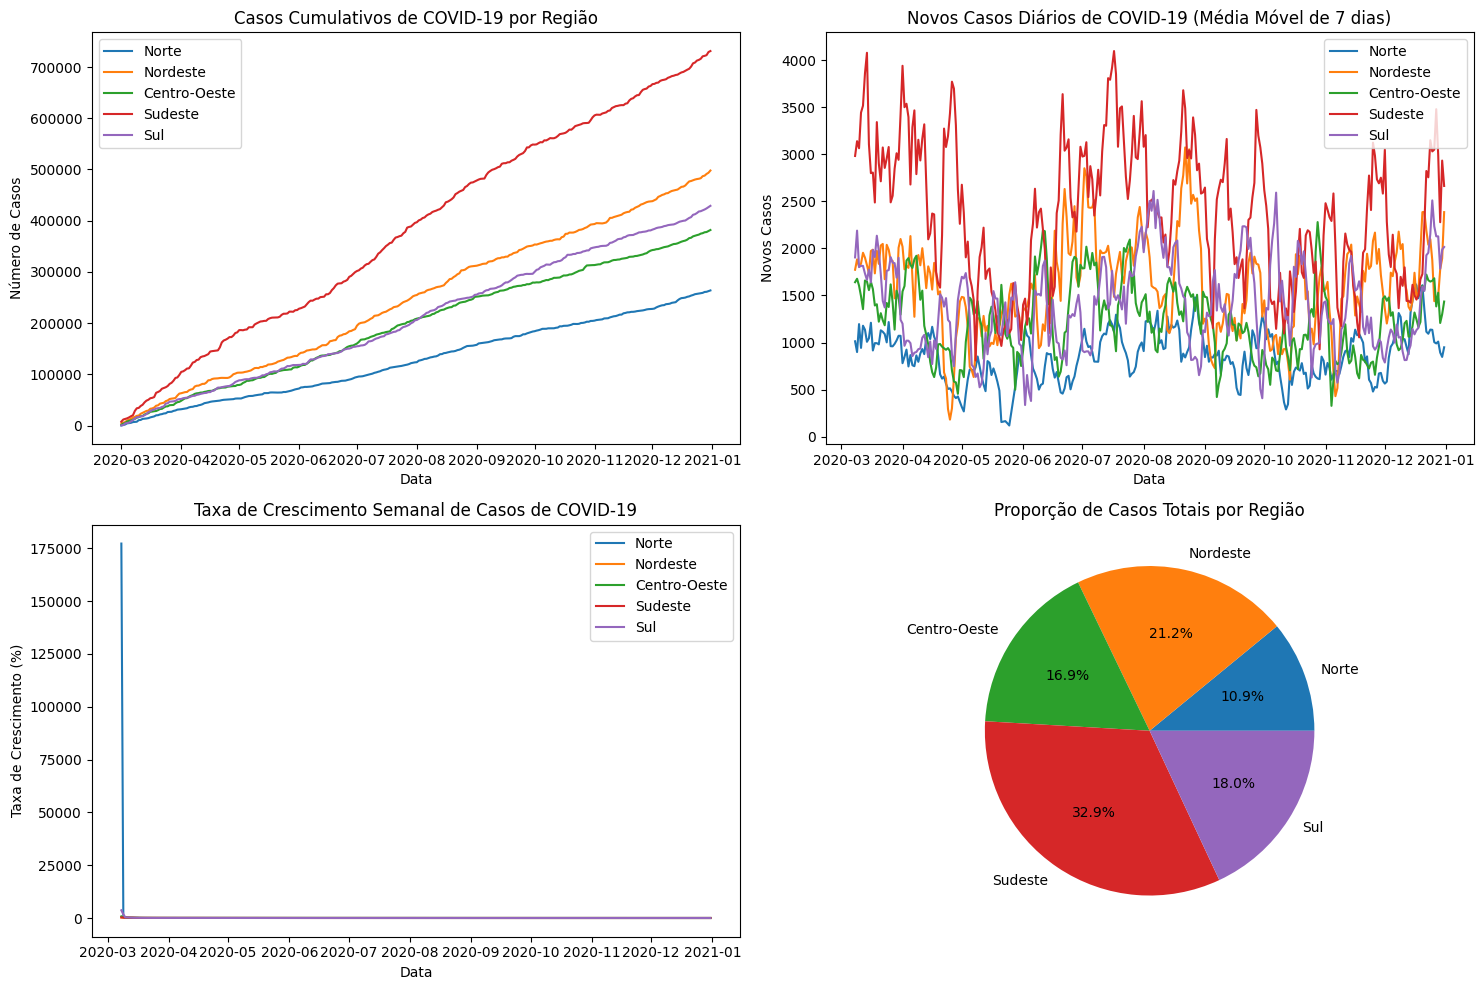

In [9]:
import matplotlib.pyplot as plt

# Configuração do plot
plt.figure(figsize=(15, 10))

# Plot 1: Casos cumulativos
plt.subplot(2, 2, 1)
for region in regions:
    plt.plot(df.index, df[region], label=region)
plt.title('Casos Cumulativos de COVID-19 por Região')
plt.xlabel('Data')
plt.ylabel('Número de Casos')
plt.legend()

# Plot 2: Novos casos diários (média móvel de 7 dias)
plt.subplot(2, 2, 2)
daily_cases = df.diff()
for region in regions:
    plt.plot(df.index, daily_cases[region].rolling(window=7).mean(), label=region)
plt.title('Novos Casos Diários de COVID-19 (Média Móvel de 7 dias)')
plt.xlabel('Data')
plt.ylabel('Novos Casos')
plt.legend()

# Plot 3: Taxa de crescimento semanal
plt.subplot(2, 2, 3)
weekly_growth = df.pct_change(periods=7) * 100
for region in regions:
    plt.plot(df.index, weekly_growth[region], label=region)
plt.title('Taxa de Crescimento Semanal de Casos de COVID-19')
plt.xlabel('Data')
plt.ylabel('Taxa de Crescimento (%)')
plt.legend()

# Plot 4: Proporção de casos por região
plt.subplot(2, 2, 4)
total_cases = df.sum()
plt.pie(total_cases, labels=regions, autopct='%1.1f%%')
plt.title('Proporção de Casos Totais por Região')

plt.tight_layout()
plt.show()

# Bibliotecas de Visualização em Python

Python oferece diversas bibliotecas poderosas para visualização de dados, cada uma com suas próprias vantagens:

## Matplotlib

**Apresentação**: Matplotlib é a biblioteca de visualização mais fundamental e amplamente utilizada em Python.

**Propósito**: Criada para produzir gráficos e visualizações de dados de qualidade para publicação, oferecendo um controle granular sobre todos os aspectos da figura.

**Prós**:
- Extremamente flexível e customizável
- Suporta uma ampla gama de tipos de gráficos
- Integração robusta com NumPy e outras bibliotecas científicas
- Grande comunidade e extensa documentação

**Contras**:
- Curva de aprendizado íngreme para recursos avançados
- Sintaxe pode ser verbosa para gráficos simples
- Estilo padrão menos moderno comparado a alternativas mais recentes

**Documentação**: [https://matplotlib.org/stable/contents.html](https://matplotlib.org/stable/contents.html)

## Seaborn

**Apresentação**: Seaborn é uma biblioteca de visualização estatística construída sobre o Matplotlib.

**Propósito**: Desenvolvida para criar visualizações estatísticas atraentes e informativas com menos código, focando em tornar os gráficos estatísticos mais acessíveis e esteticamente agradáveis.

**Prós**:
- Esteticamente agradável por padrão
- Simplifica a criação de gráficos estatísticos complexos
- Integração perfeita com pandas DataFrames
- Temas e paletas de cores pré-definidos de alta qualidade

**Contras**:
- Menos flexível que o Matplotlib para customizações muito específicas
- Conjunto mais limitado de tipos de gráficos em comparação com Matplotlib
- Pode ser mais lento para renderizar gráficos muito grandes

**Documentação**: [https://seaborn.pydata.org/](https://seaborn.pydata.org/)


## Plotly

**Apresentação**: Plotly é uma biblioteca moderna focada em gráficos interativos e visualizações web.

**Propósito**: Criada para produzir visualizações interativas e responsivas que podem ser facilmente incorporadas em aplicações web e dashboards.

**Prós**:
- Gráficos altamente interativos e dinâmicos
- Excelente para criação de dashboards
- Suporte nativo para gráficos 3D e animações
- Fácil integração com frameworks web

**Contras**:
- Curva de aprendizado inicial para usuários acostumados com Matplotlib
- Pode ser mais pesado em termos de recursos computacionais
- Algumas funcionalidades avançadas requerem uma versão paga

**Docimentação**: [https://plotly.com/python/](https://plotly.com/python/)


## Comparação Rápida

- **Matplotlib**: Melhor para controle preciso e personalização avançada
- **Seaborn**: Ideal para visualizações estatísticas rápidas e atraentes
- **Plotly**: Preferível para gráficos interativos e integração web

A escolha da biblioteca dependerá das necessidades específicas do projeto, considerando fatores como interatividade, estética e complexidade dos dados a serem visualizados.

# Visualização de Dados com Matplotlib

# Sumário

## [1. Introdução ao Matplotlib](#1.-Introdução-ao-Matplotlib)
- [1.1 Instalação e configuração](#1.1-Instalação-e-configuração)
- [1.2 Pyplot vs Object-Oriented Interface](#1.2-Pyplot-vs-Object-Oriented-Interface)

## [2. Plots Básicos](#2.-Plots-Básicos)
- [2.1 Line plots](#2.1-Line-plots)
- [2.2 Scatter plots](#2.2-Scatter-plots)
- [2.3 Bar plots](#2.3-Bar-plots)
- [2.4 Histograms](#2.4-Histograms)
- [2.5 Pie charts](#2.5-Pie-charts)

## [3. Customização de Plots](#3.-Customização-de-Plots)
- [3.1 Cores, marcadores e estilos de linha](#3.1-Cores,-marcadores-e-estilos-de-linha)
- [3.2 Eixos e limites](#3.2-Eixos-e-limites)
- [3.3 Legendas](#3.3-Legendas)
- [3.4 Títulos e rótulos](#3.4-Títulos-e-rótulos)
- [3.5 Grid e ticks](#3.5-Grid-e-ticks)

## [4. Subplots e Layouts](#4.-Subplots-e-Layouts)
- [4.1 Criando múltiplos subplots](#4.1-Criando-múltiplos-subplots)
- [4.2 Layouts com gridspec](#4.2-Layouts-com-gridspec)
- [4.3 Inset plots](#4.3-Inset-plots)

## [5. Tipos de Plots Avançados](#5.-Tipos-de-Plots-Avançados)
- [5.1 Contour plots](#5.1-Contour-plots)
- [5.2 Heatmaps](#5.2-Heatmaps)
- [5.3 3D plots](#5.3-3D-plots)
- [5.4 Polar plots](#5.4-Polar-plots)
- [5.5 Stream plots](#5.5-Stream-plots)

## [6. Integração com outras bibliotecas](#6.-Integração-com-outras-bibliotecas)
- [6.1 Matplotlib com NumPy](#6.1-Matplotlib-com-NumPy)
- [6.2 Matplotlib com Pandas](#6.2-Matplotlib-com-Pandas)
- [6.3 Matplotlib com Seaborn](#6.3-Matplotlib-com-Seaborn)

## [7. Melhores Práticas e Otimização](#7.-Melhores-Práticas-e-Otimização)
- [7.1 Escolhendo o tipo de plot correto](#7.1-Escolhendo-o-tipo-de-plot-correto)
- [7.2 Otimização de performance](#7.2-Otimização-de-performance)
- [7.3 Exportando e salvando figuras](#7.3-Exportando-e-salvando-figuras)

## 1. Introdução ao Matplotlib



### Instalação e configuração
```bash
pip install matplotlib

```


### Pyplot vs Object-Oriented Interface
O Matplotlib oferece duas interfaces principais para criação de gráficos:

Pyplot Interface (Estilo MATLAB):

Mais simples e direta
Boa para análises rápidas
Menos controle sobre os elementos do gráfico


Object-Oriented Interface:

Mais verbosa mas mais flexível
Melhor para gráficos complexos
Maior controle sobre cada elemento
Recomendada para projetos maiores



Vamos ver exemplos de ambas:

#### Exemplo com Pyplot

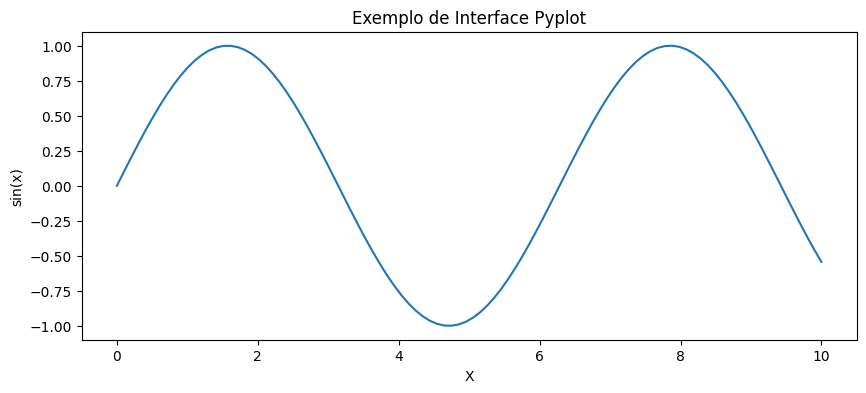

In [10]:

import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
plt.figure(figsize=(10, 4))
plt.plot(x, np.sin(x))
plt.title('Exemplo de Interface Pyplot')
plt.xlabel('X')
plt.ylabel('sin(x)')
plt.show()

#### Exemplo com Object-Oriented Interface

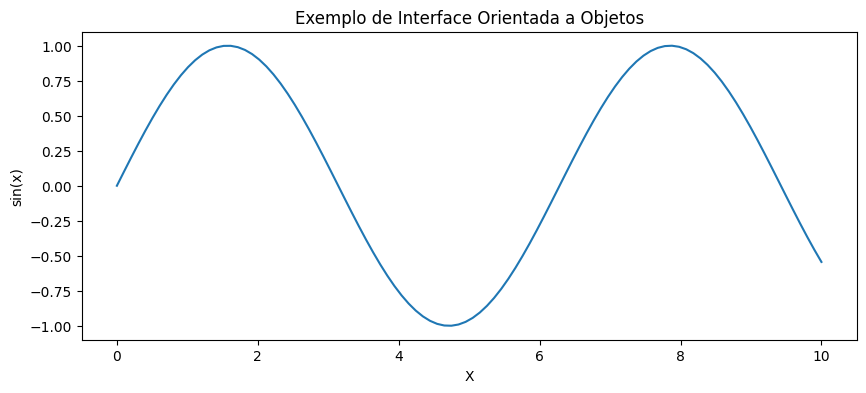

In [11]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x, np.sin(x))
ax.set_title('Exemplo de Interface Orientada a Objetos')
ax.set_xlabel('X')
ax.set_ylabel('sin(x)')
plt.show()

## 2. Plots Básicos

### Line Plots (Gráficos de Linha)
Gráficos de linha são uma das visualizações mais fundamentais e versáteis.
Casos de uso:

- Séries temporais
- Tendências
- Relações contínuas entre variáveis
- Comparação de múltiplas séries de dados

Principais parâmetros:

- linewidth: espessura da linha
- linestyle: estilo da linha (-, --, -., :)
- marker: marcador de pontos (o, s, ^, *)
- color: cor da linha

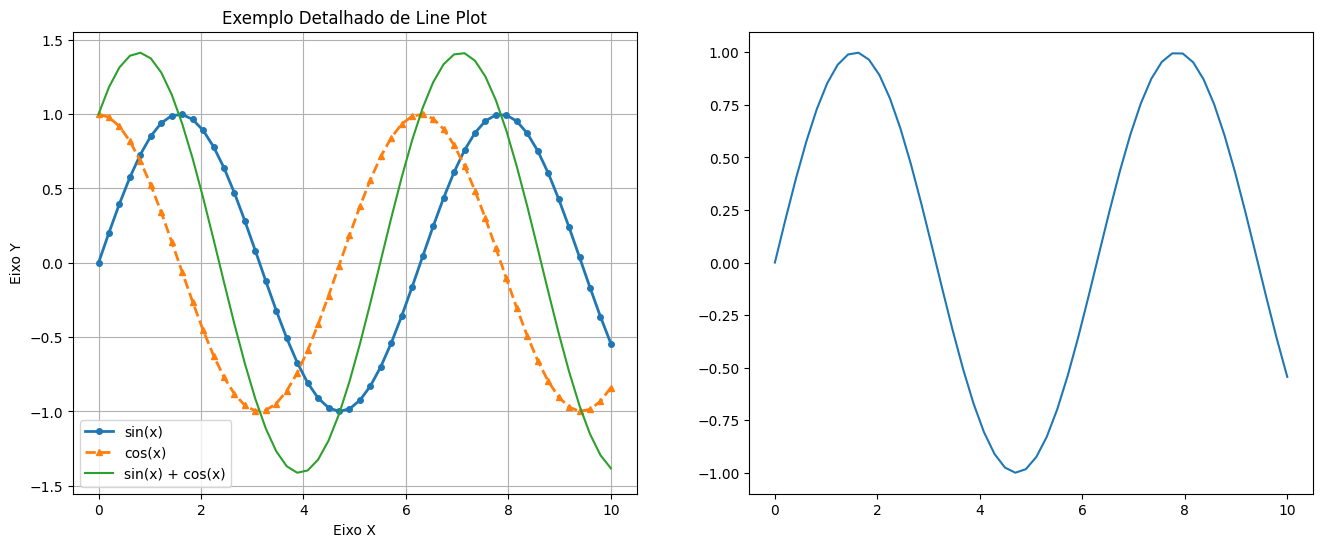

In [31]:
x = np.linspace(0, 10, 50)
y1 = np.sin(x)
y2 = np.cos(x)
fig, ax = plt.subplots(1,2, figsize=(16, 6))
ax[0].plot(x, y1, label='sin(x)', linewidth=2, linestyle='-', marker='o', markersize=4)
ax[0].plot(x, y2, label='cos(x)', linewidth=2, linestyle='--', marker='^', markersize=4)
ax[0].plot(x, y1 + y2, label='sin(x) + cos(x)')
ax[0].set_title('Exemplo Detalhado de Line Plot')
ax[0].set_xlabel('Eixo X')
ax[0].set_ylabel('Eixo Y')
ax[0].grid(True)
ax[0].legend()
ax[1].plot(x, y1,)
plt.show()

### 2.2 Scatter Plots (Gráficos de Dispersão)
Scatter plots são ideais para visualizar relações entre duas variáveis contínuas.

Casos de uso:

- Análise de correlação
- Identificação de clusters
- Detecção de outliers
- Visualização de padrões

Principais parâmetros:

- s: tamanho dos pontos
- c: cor (pode ser um array para colormap)
- alpha: transparência
- marker: forma dos pontos

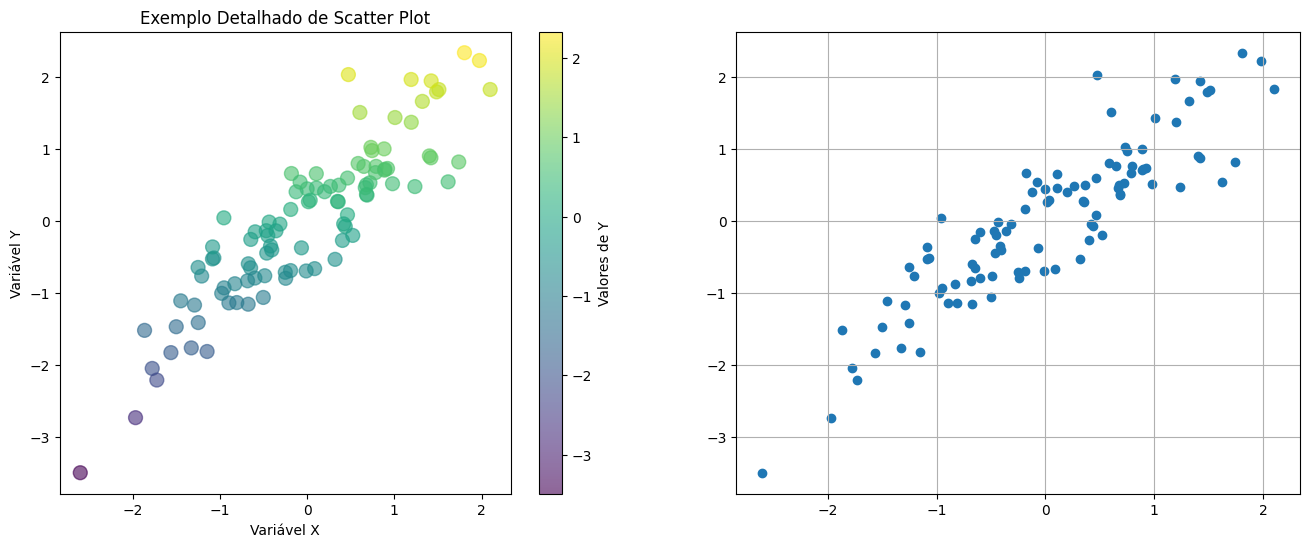

In [32]:
x = np.random.normal(0, 1, 100)
y = x + np.random.normal(0, 0.5, 100)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))
scatter = ax1.scatter(x, y,
c=y,           # cor baseada nos valores de y
s=100,         # tamanho dos pontos
alpha=0.6,     # transparência
cmap='viridis')
ax1.set_title('Exemplo Detalhado de Scatter Plot')
ax1.set_xlabel('Variável X')
ax1.set_ylabel('Variável Y')
plt.colorbar(scatter, label='Valores de Y')
plt.grid(True)
ax2.scatter(x, y)
plt.show()

### 2.3 Bar Plots (Gráficos de Barras)
Bar plots são excelentes para comparar valores entre diferentes categorias.

Casos de uso:

- Comparação entre categorias
- Visualização de distribuições discretas
- Rankings e comparações
- Análise de frequências

Tipos de bar plots:

- Verticais (bar)
- Horizontais (barh)
- Empilhados (stacked)
- Agrupados (grouped)


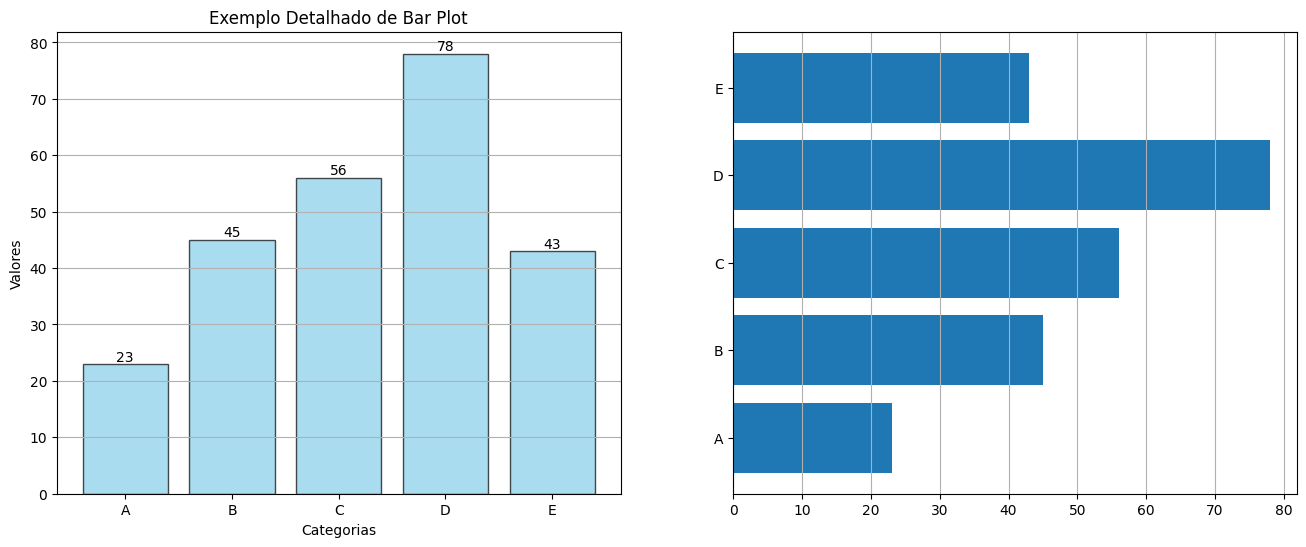

In [47]:
categories = ['A', 'B', 'C', 'D', 'E']
values = [23, 45, 56, 78, 43]
fig, (ax, ax2) = plt.subplots(1,2, figsize=(16, 6))
bars = ax.bar(categories,
values,
color='skyblue',     # cor das barras
edgecolor='black',   # cor da borda
linewidth=1,         # espessura da borda
alpha=0.7)      # transparência
#Adicionar valores no topo das barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
    f'{int(height)}',
    ha='center', va='bottom')
ax.set_title('Exemplo Detalhado de Bar Plot')
ax.set_xlabel('Categorias')
ax.set_ylabel('Valores')
ax.grid(True, axis='y')
ax2.barh(categories, values)
ax2.grid(True, axis='x')
plt.show()

### 2.4 Histograms (Histogramas)
Histogramas são ótimos para:

- Visualizar distribuição de dados
- Identificar a forma da distribuição (normal, assimétrica, etc.)
- Detectar outliers e padrões
- Estimar densidade de probabilidade

Parâmetros importantes:

- bins: número de intervalos
- density: normalização
- alpha: transparência

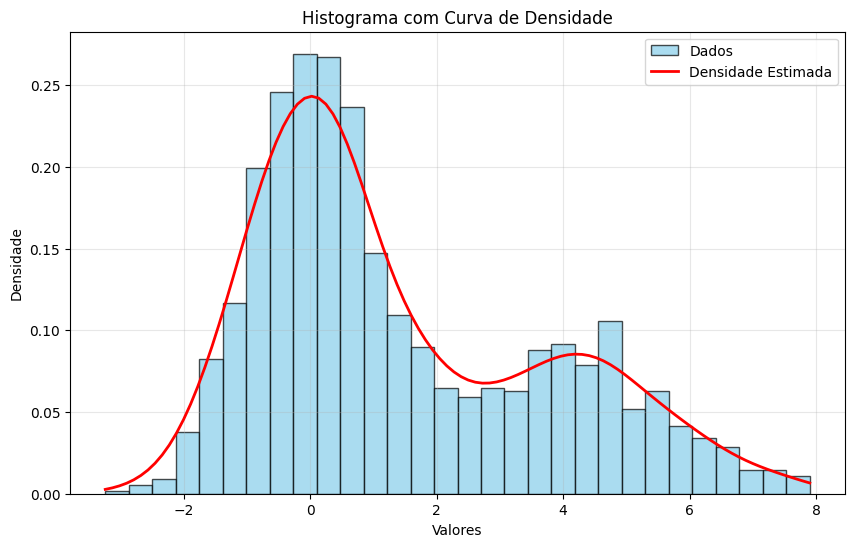

In [49]:
from scipy.stats import gaussian_kde


np.random.seed(42)
data = np.concatenate([
    np.random.normal(0, 1, 1000),    # Distribuição normal com média 0
    np.random.normal(4, 1.5, 500)    # Outra distribuição normal com média 4
])

# Criando o histograma
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(data, 
        bins=30,                    # Número de bins
        density=True,               # Normaliza os dados
        alpha=0.7,                  # Transparência
        color='skyblue',           # Cor das barras
        edgecolor='black',         # Cor da borda
        label='Dados')             # Label para legenda

# Adicionar uma curva de densidade (KDE)
kde = gaussian_kde(data)
x_range = np.linspace(min(data), max(data), 100)
ax.plot(x_range, kde(x_range), 'r-', lw=2, 
        label='Densidade Estimada')

ax.set_title('Histograma com Curva de Densidade')
ax.set_xlabel('Valores')
ax.set_ylabel('Densidade')
ax.grid(True, alpha=0.3)
ax.legend()

plt.show()

### 2.5 Pie Charts (Gráficos de Pizza)

Gráficos de pizza são úteis para:

- Mostrar proporções de um todo
- Visualizar composição percentual
- Comparar partes de uma distribuição
- Demonstrar divisão de recursos

Parâmetros importantes:

- autopct: formato dos percentuais
- explode: separação das fatias
- shadow: efeito de sombra
- startangle: ângulo inicial

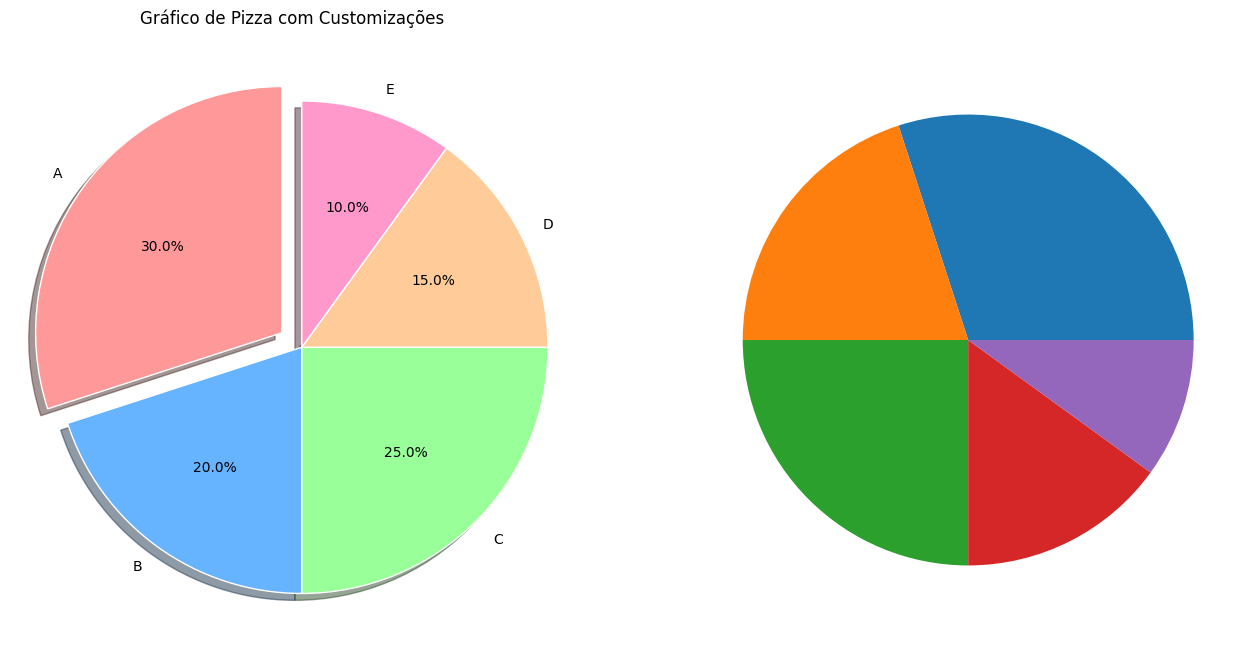

In [58]:
categorias = ['A', 'B', 'C', 'D', 'E']
valores = [30, 20, 25, 15, 10]
cores = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
explode = (0.1, 0, 0, 0, 0)  # Destaca primeira fatia

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 8))

ax1.pie(valores, 
        explode=explode,                # Separação das fatias
        labels=categorias,              # Labels das fatias
        colors=cores,                   # Cores personalizadas
        autopct='%1.1f%%',             # Formato dos percentuais
        shadow=True,                    # Sombra
        startangle=90,                  # Ângulo inicial
        wedgeprops={'edgecolor': 'white'})  # Borda branca entre fatias

ax1.set_title('Gráfico de Pizza com Customizações')
# Garante que o pie chart seja circular
ax1.axis('equal')
ax2.pie(valores)
plt.show()

### 2.6 Heatmap (Mapa de Calor)
Heatmaps são efetivos para:

- Visualizar matrizes de dados
- Mostrar correlações
- Identificar padrões
- Análise de clusters

Parâmetros importantes:

- cmap: esquema de cores
- annot: anotações nos quadrados
- fmt: formato das anotações
- linewidth: largura das linhas de grade

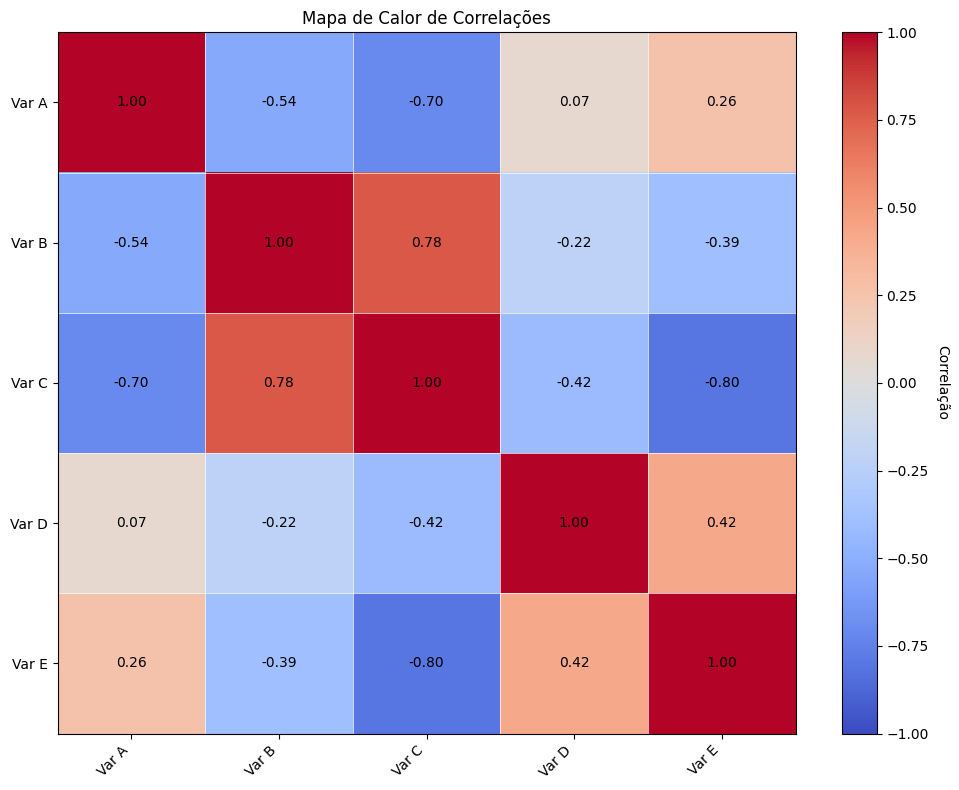

In [60]:

data = np.random.randn(5, 5)
correlation_matrix = np.corrcoef(data)

# Criando labels
labels = ['Var A', 'Var B', 'Var C', 'Var D', 'Var E']

# Criando o heatmap
fig, ax = plt.subplots(figsize=(10, 8))

# Criar o heatmap usando matplotlib
im = ax.imshow(correlation_matrix, 
                cmap='coolwarm',    # Esquema de cores
                aspect='auto',      # Aspecto automático
                vmin=-1,           # Valor mínimo para cores
                vmax=1)            # Valor máximo para cores

# Adicionar barra de cores
cbar = plt.colorbar(im)
cbar.set_label('Correlação', rotation=270, labelpad=15)

# Adicionar valores nas células
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, f'{correlation_matrix[i, j]:.2f}',
                    ha='center', va='center', color='black')

# Configurar ticks e labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotacionar labels do eixo x
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Adicionar título
ax.set_title('Mapa de Calor de Correlações')

# Ajustar grid
ax.set_xticks(np.arange(len(labels)+1)-.5, minor=True)
ax.set_yticks(np.arange(len(labels)+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=0.5)
ax.tick_params(which="minor", bottom=False, left=False)

# Ajustar layout
plt.tight_layout()
plt.show()

#### Alternativa menos verbosa

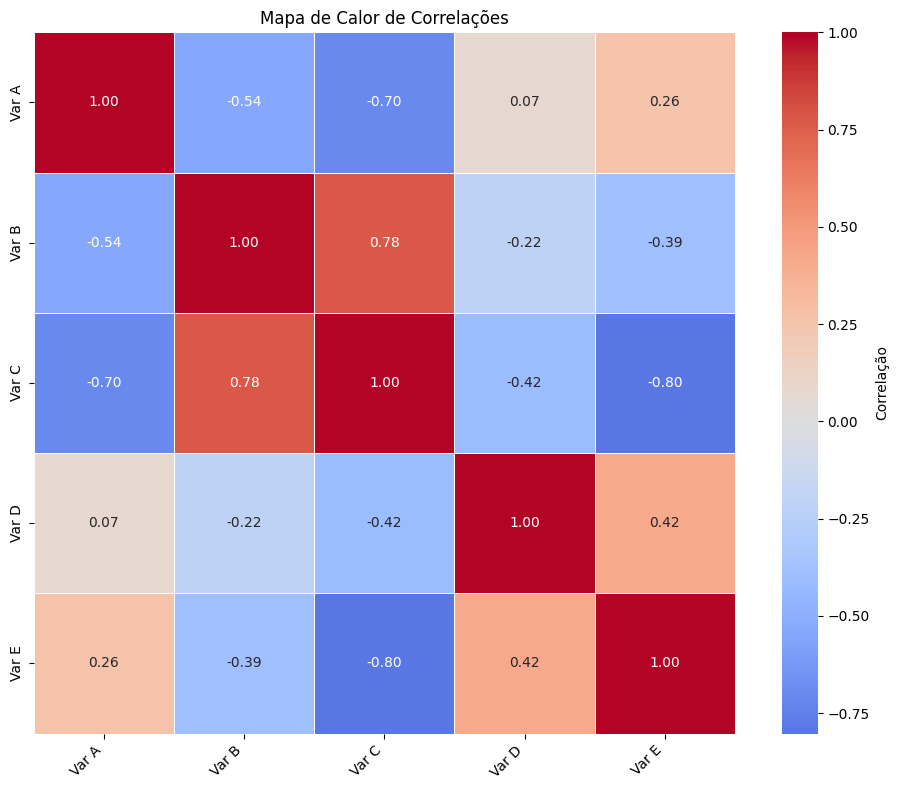

In [64]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
           xticklabels=labels,
           yticklabels=labels,
           annot=True,              # Mostra os valores
           fmt='.2f',              # Formato dos números (2 casas decimais)
           cmap='coolwarm',        # Esquema de cores
           center=0,               # Centro da escala de cores
           square=True,            # Células quadradas
           linewidths=0.5,         # Largura das linhas
           cbar_kws={'label': 'Correlação'})  # Label da barra de cor

# Configurações adicionais
plt.title('Mapa de Calor de Correlações')
plt.xticks(rotation=45, ha='right')  # Rotação dos labels do eixo x
plt.tight_layout()

plt.show()

## 3. Customização de Plots com Matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo que usaremos ao longo do notebook
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

### 3.1 Cores, Marcadores e Estilos de Linha

#### Cores
Matplotlib oferece diversas opções para personalizar a aparência das linhas e pontos em seus gráficos.
Cores

Podemos especificar cores usando:

- Nomes: 'red', 'blue', 'green'
- Códigos hex: '#FF0000'
- RGB tuples: (1.0, 0.0, 0.0)
- Escala de cinza: '0.75'

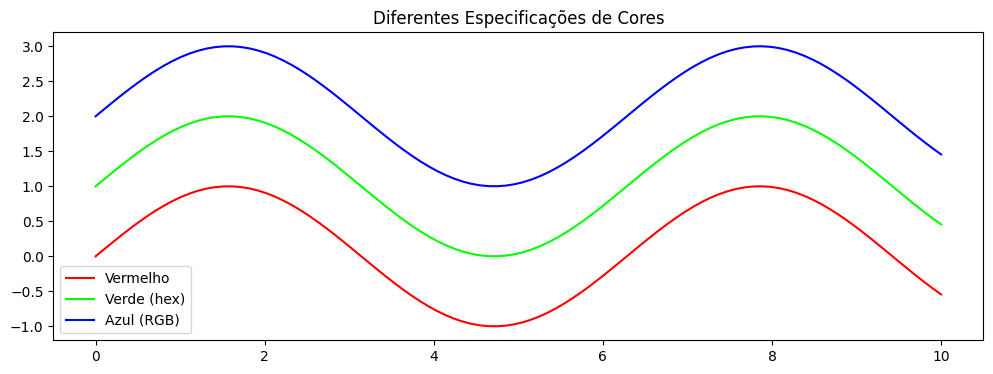

In [2]:
plt.figure(figsize=(12, 4))

# Diferentes formas de especificar cores
plt.plot(x, y1, color='red', label='Vermelho')
plt.plot(x, y1 + 1, color='#00FF00', label='Verde (hex)')
plt.plot(x, y1 + 2, color=(0, 0, 1), label='Azul (RGB)')

plt.title('Diferentes Especificações de Cores')
plt.legend()
plt.show()

#### Marcadores
Marcadores são símbolos usados para destacar pontos específicos no gráfico.

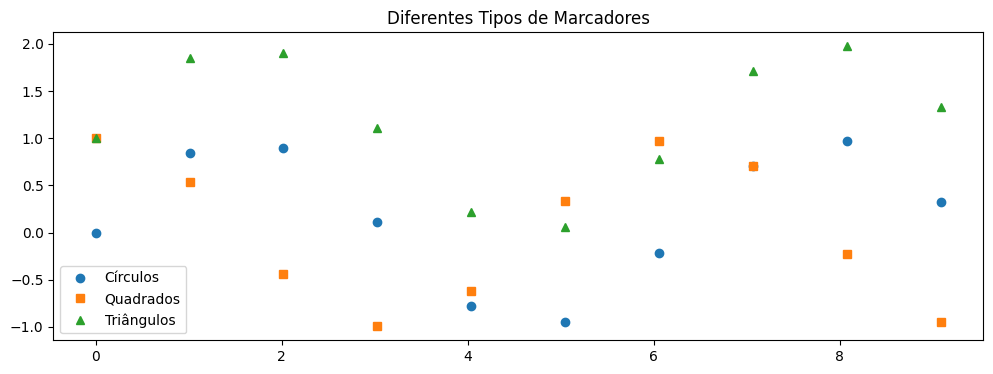

In [3]:
plt.figure(figsize=(12, 4))

# Diferentes tipos de marcadores
plt.plot(x[::10], y1[::10], 'o', label='Círculos')
plt.plot(x[::10], y2[::10], 's', label='Quadrados')
plt.plot(x[::10], y1[::10] + 1, '^', label='Triângulos')

plt.title('Diferentes Tipos de Marcadores')
plt.legend()
plt.show()

#### Estilos de Linha


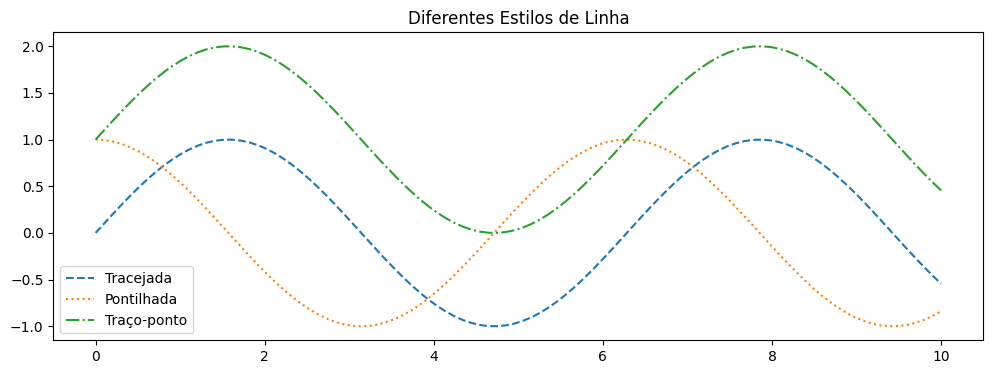

In [4]:
plt.figure(figsize=(12, 4))

# Diferentes estilos de linha
plt.plot(x, y1, '--', label='Tracejada')
plt.plot(x, y2, ':', label='Pontilhada')
plt.plot(x, y1 + 1, '-.', label='Traço-ponto')

plt.title('Diferentes Estilos de Linha')
plt.legend()
plt.show()

### 3.2 Eixos e Limites

Podemos controlar os limites e a escala dos eixos para melhor visualização dos dados.

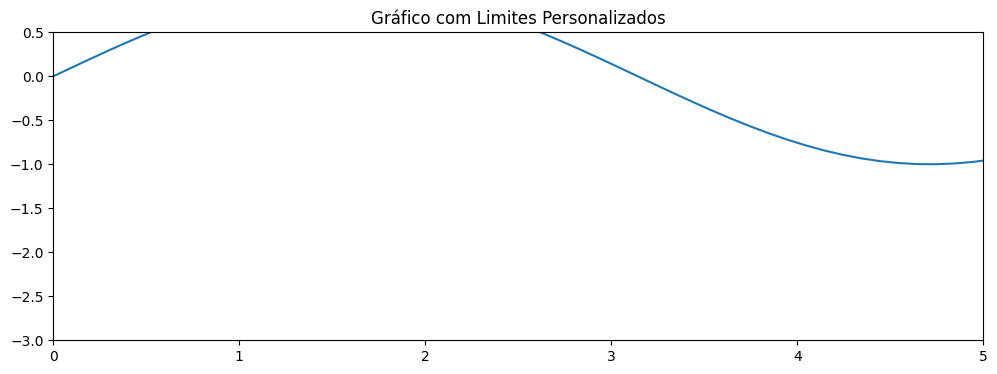

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(x, y1)

# Configurando limites
plt.xlim(0, 5)  # Define limites do eixo x
plt.ylim(-3, 0.5)  # Define limites do eixo y

plt.title('Gráfico com Limites Personalizados')
plt.show()

### 3.3 Legendas

As legendas são essenciais para identificar diferentes elementos no gráfico.

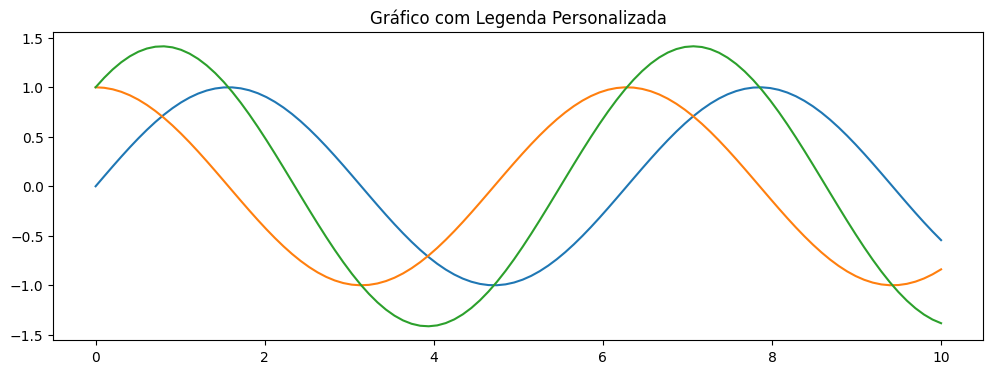

In [12]:
plt.figure(figsize=(12, 4))

# Múltiplas linhas com legendas
plt.plot(x, y1, label='Seno')
plt.plot(x, y2, label='Cosseno')
plt.plot(x, y1 + y2, label='Soma')

# Personalizando a legenda
plt.legend(
    loc='upper right',  # Posição
    bbox_to_anchor=(1.15, 1),  # Ajuste fino da posição
    frameon=True,  # Borda
    shadow=True  # Sombra
)

plt.title('Gráfico com Legenda Personalizada')
plt.show()

### 3.4 Títulos e Rótulos

Títulos e rótulos ajudam a contextualizar os dados apresentados.

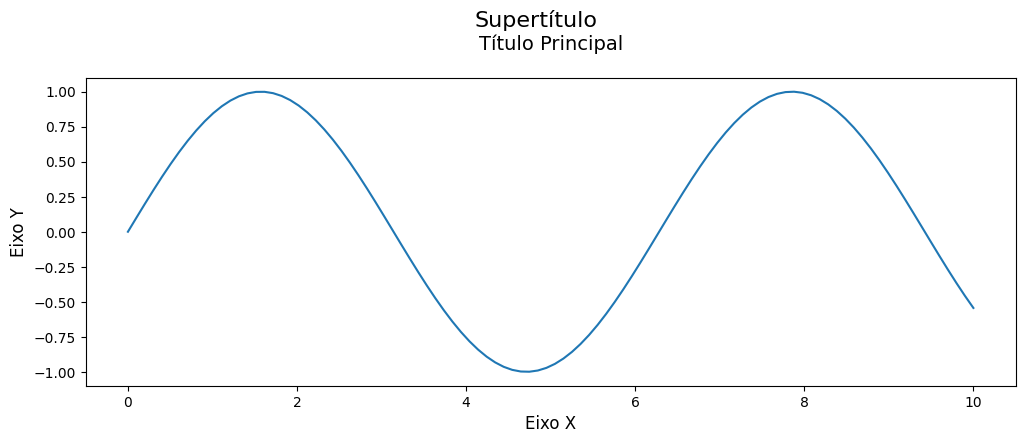

In [13]:
plt.figure(figsize=(12, 4))
plt.plot(x, y1)

# Adicionando títulos e rótulos
plt.title('Título Principal', fontsize=14, pad=20)
plt.xlabel('Eixo X', fontsize=12)
plt.ylabel('Eixo Y', fontsize=12)

# Título para a figura inteira
plt.suptitle('Supertítulo', fontsize=16, y=1.05)

plt.show()

### 3.5 Grid e Ticks
O grid ajuda na leitura dos valores e os ticks podem ser personalizados para melhor apresentação.


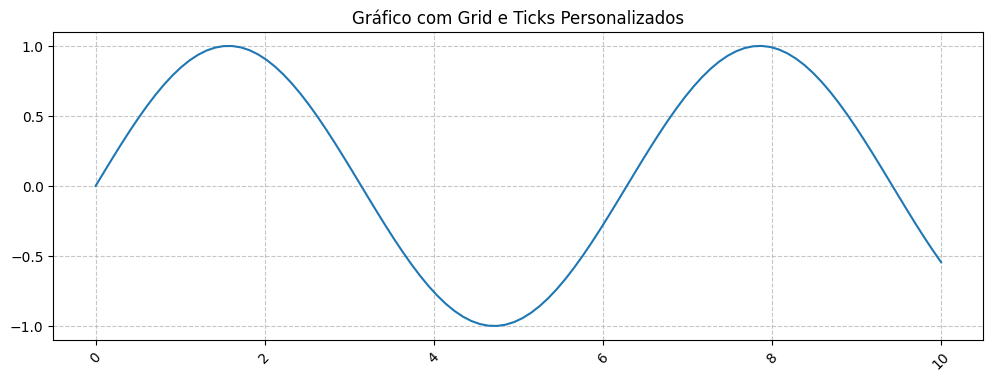

In [14]:
plt.figure(figsize=(12, 4))
plt.plot(x, y1)

# Configurando o grid
plt.grid(True, linestyle='--', alpha=0.7)

# Personalizando os ticks
plt.xticks(np.arange(0, 11, 2))  # Ticks do eixo x a cada 2 unidades
plt.yticks(np.arange(-1, 1.1, 0.5))  # Ticks do eixo y a cada 0.5 unidades

# Rotacionando os labels dos ticks
plt.xticks(rotation=45)

plt.title('Gráfico com Grid e Ticks Personalizados')
plt.show()

## 4. Subplots e Layouts com Matplotlib

In [15]:
# Dados de exemplo que usaremos ao longo do notebook
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
y4 = x**2

### 4.1 Criando Múltiplos Subplots
Existem várias maneiras de criar subplots no Matplotlib. Vamos explorar as principais abordagens.

#### Método 1: plt.subplot()

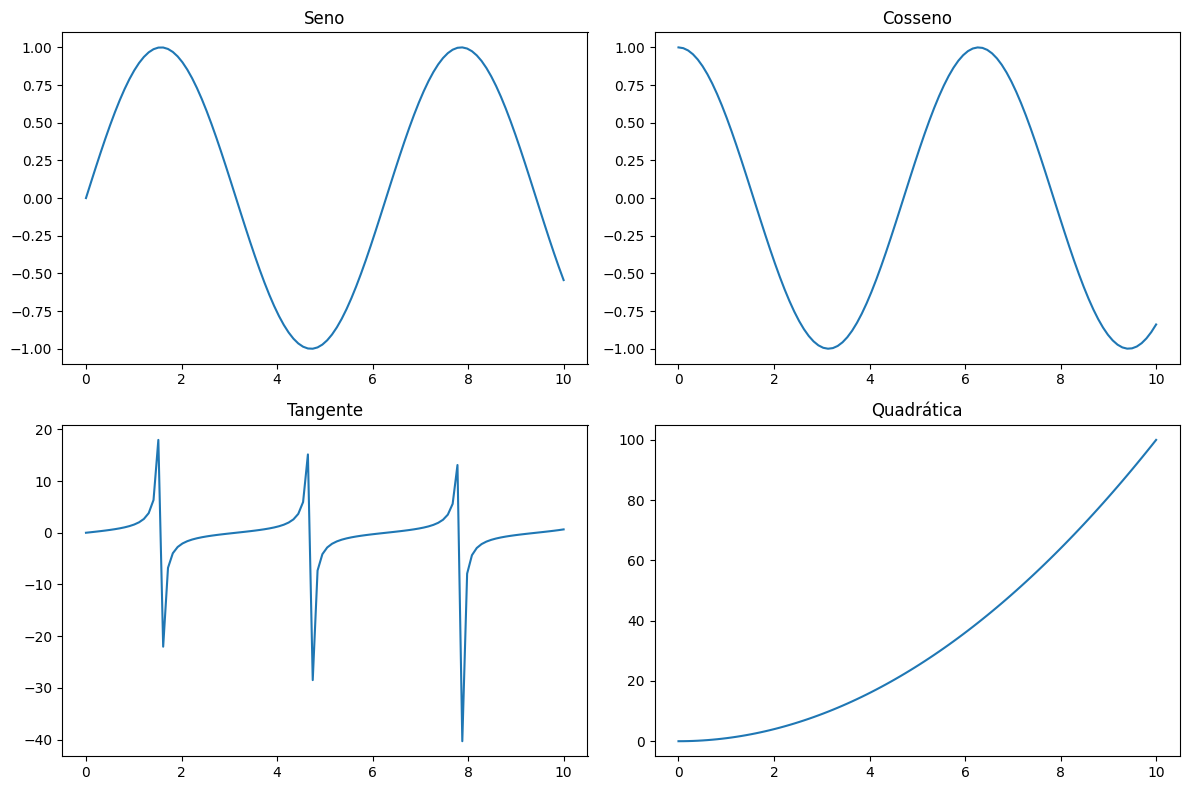

In [16]:
plt.figure(figsize=(12, 8))

# Criando 4 subplots em grade 2x2
plt.subplot(2, 2, 1)  # (nrows, ncols, index)
plt.plot(x, y1)
plt.title('Seno')

plt.subplot(2, 2, 2)
plt.plot(x, y2)
plt.title('Cosseno')

plt.subplot(2, 2, 3)
plt.plot(x, y3)
plt.title('Tangente')

plt.subplot(2, 2, 4)
plt.plot(x, y4)
plt.title('Quadrática')

plt.tight_layout()  # Ajusta automaticamente o espaçamento
plt.show()

#### Método 2: plt.subplots()

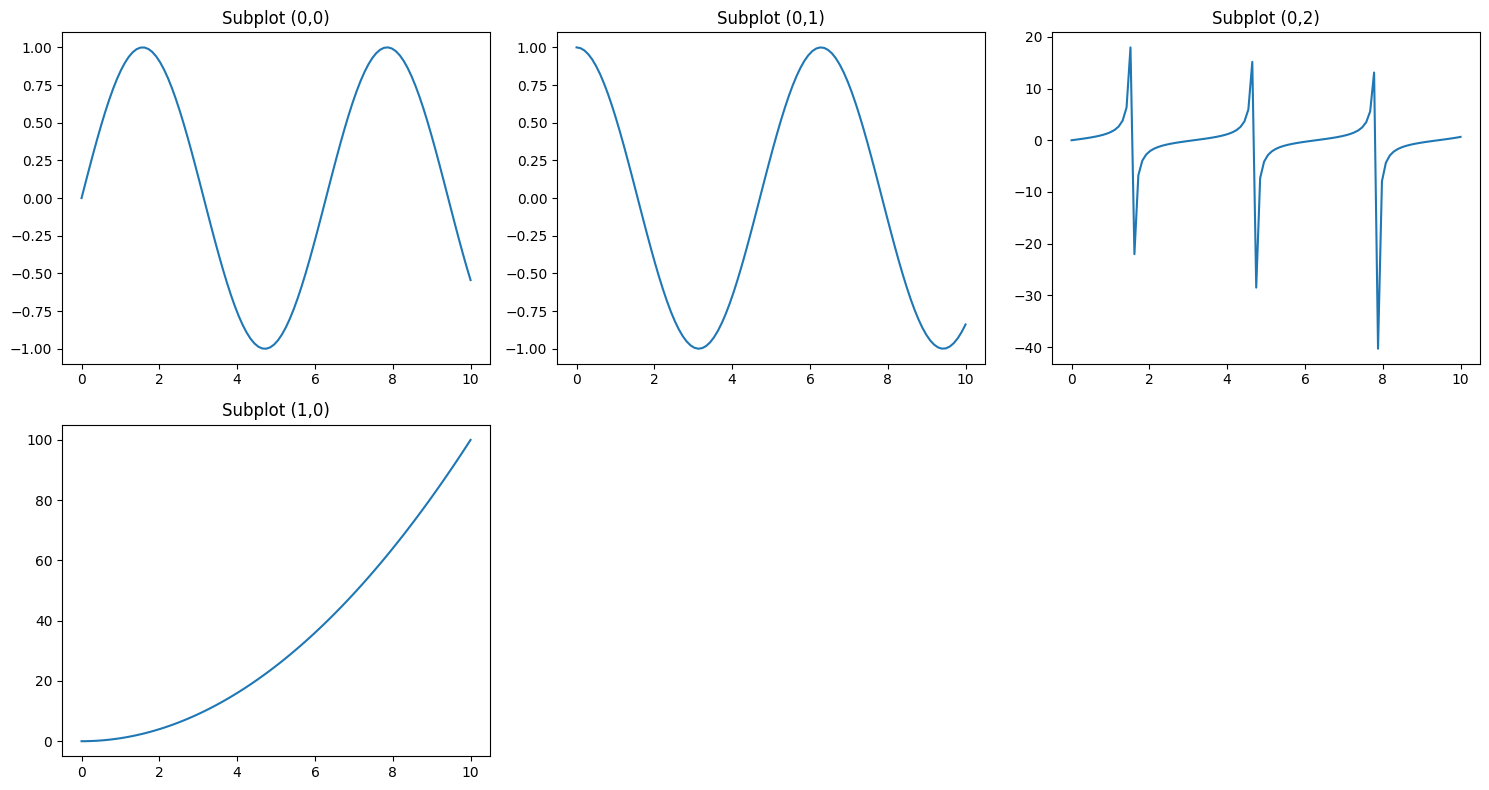

In [17]:
# Criando figura e axes de uma vez
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Plotando em cada subplot
axs[0, 0].plot(x, y1)
axs[0, 0].set_title('Subplot (0,0)')

axs[0, 1].plot(x, y2)
axs[0, 1].set_title('Subplot (0,1)')

axs[0, 2].plot(x, y3)
axs[0, 2].set_title('Subplot (0,2)')

axs[1, 0].plot(x, y4)
axs[1, 0].set_title('Subplot (1,0)')

# Removendo subplots vazios
fig.delaxes(axs[1, 1])
fig.delaxes(axs[1, 2])

plt.tight_layout()
plt.show()

#### Subplots de Diferentes Tamanhos

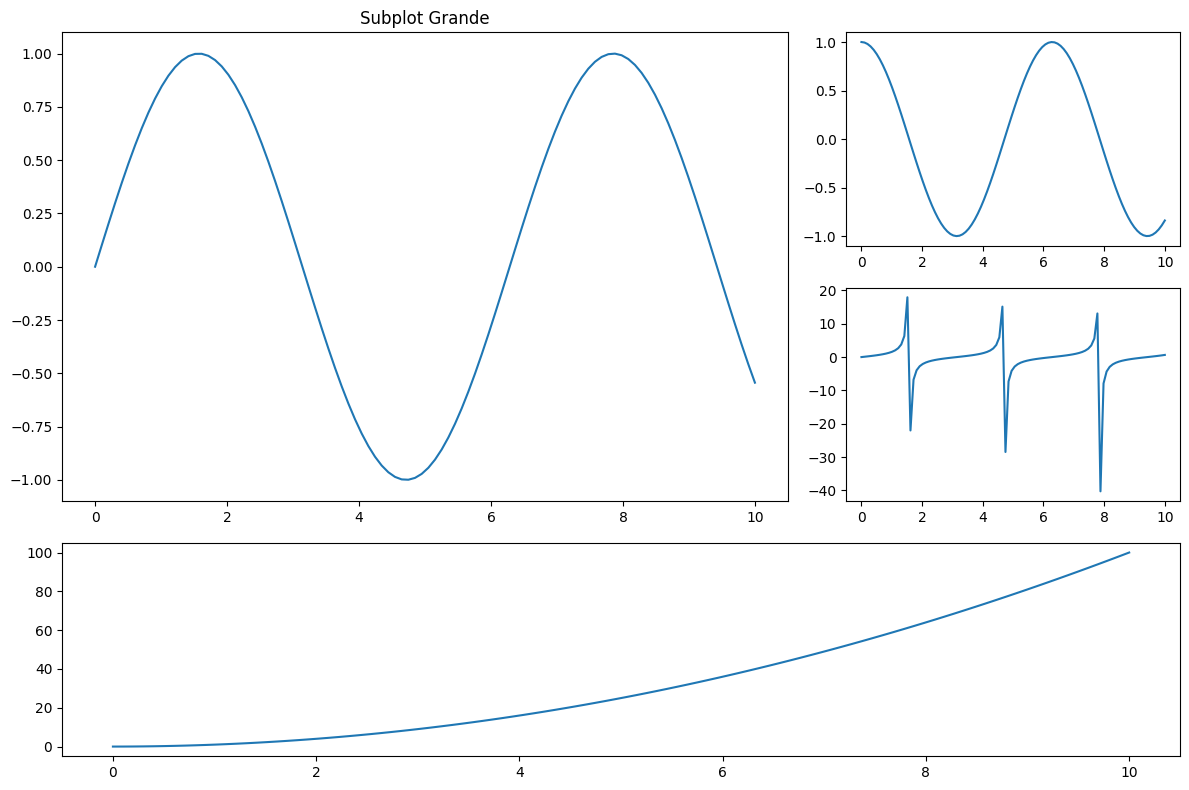

In [18]:
# Criando subplots com diferentes proporções
fig = plt.figure(figsize=(12, 8))

# Subplot maior
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=2)
ax1.plot(x, y1)
ax1.set_title('Subplot Grande')

# Subplots menores
ax2 = plt.subplot2grid((3, 3), (0, 2))
ax2.plot(x, y2)

ax3 = plt.subplot2grid((3, 3), (1, 2))
ax3.plot(x, y3)

ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
ax4.plot(x, y4)

plt.tight_layout()
plt.show()

### 4.2 Layouts com GridSpec
GridSpec oferece um controle mais flexível sobre o layout dos subplots.

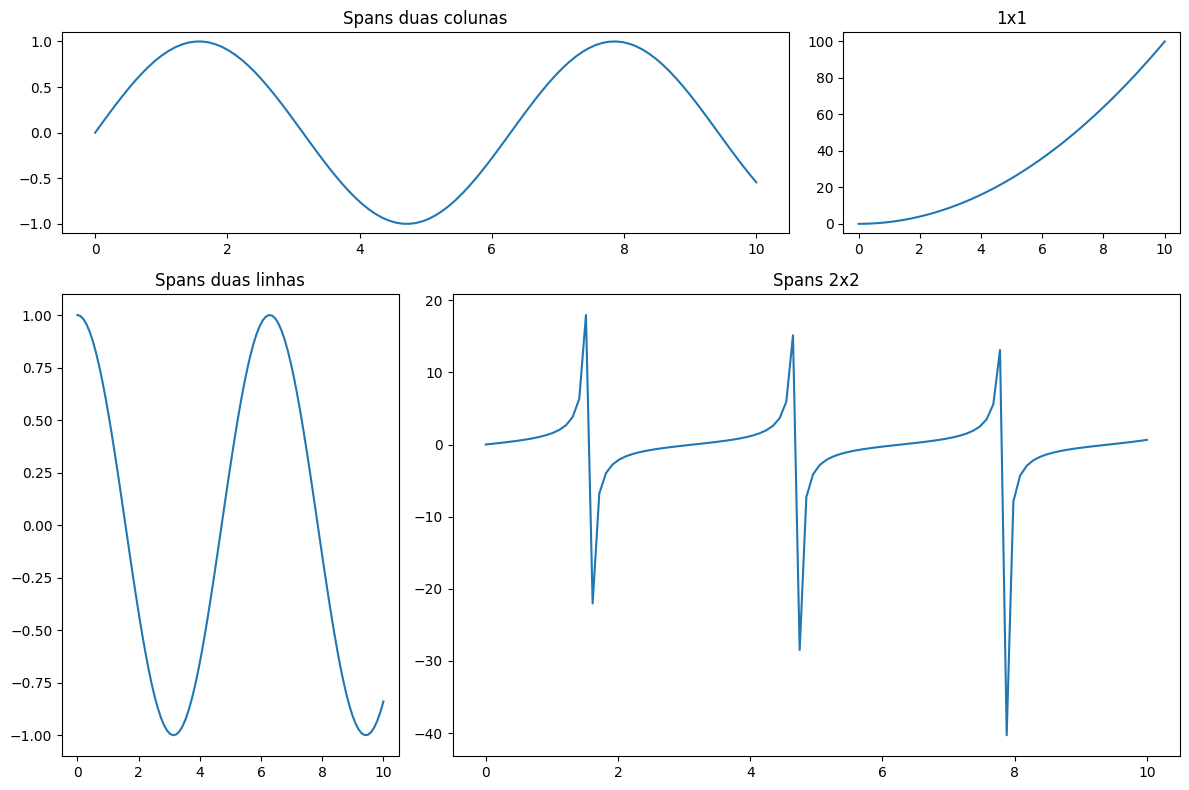

In [19]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12, 8))
gs = GridSpec(3, 3, figure=fig)

# Criando subplots com diferentes tamanhos usando GridSpec
ax1 = fig.add_subplot(gs[0, :2])
ax1.plot(x, y1)
ax1.set_title('Spans duas colunas')

ax2 = fig.add_subplot(gs[1:, 0])
ax2.plot(x, y2)
ax2.set_title('Spans duas linhas')

ax3 = fig.add_subplot(gs[1:, 1:])
ax3.plot(x, y3)
ax3.set_title('Spans 2x2')

ax4 = fig.add_subplot(gs[0, 2])
ax4.plot(x, y4)
ax4.set_title('1x1')

plt.tight_layout()
plt.show()

### 4.3 Inset Plots
Inset plots são gráficos menores dentro de um gráfico maior, úteis para mostrar detalhes ou zooms.
#### Método 1: axes.inset_axes()

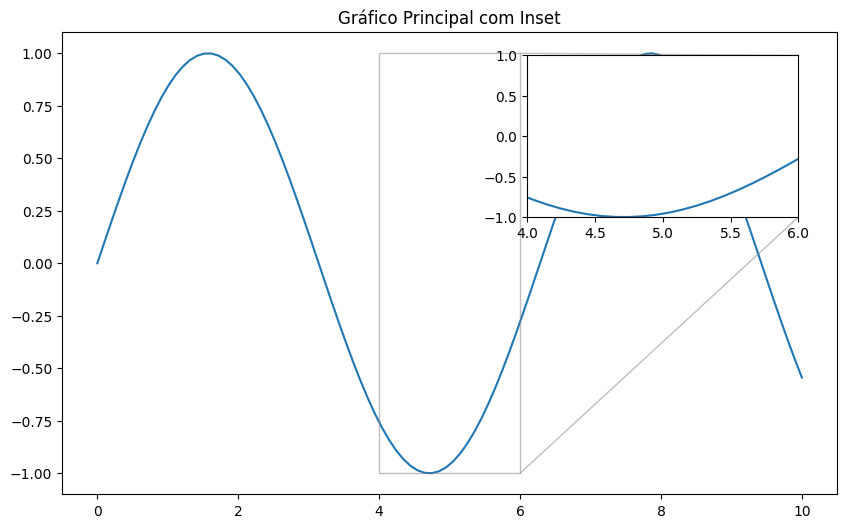

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot principal
ax.plot(x, y1)
ax.set_title('Gráfico Principal com Inset')

# Criando o inset
axins = ax.inset_axes([0.6, 0.6, 0.35, 0.35])  # [x, y, width, height]
axins.plot(x, y1)
axins.set_xlim(4, 6)  # Zoom em uma região específica
axins.set_ylim(-1, 1)

# Adicionar linhas indicando a região do zoom
ax.indicate_inset_zoom(axins)

plt.show()

#### Método 2: Usando mark_inset

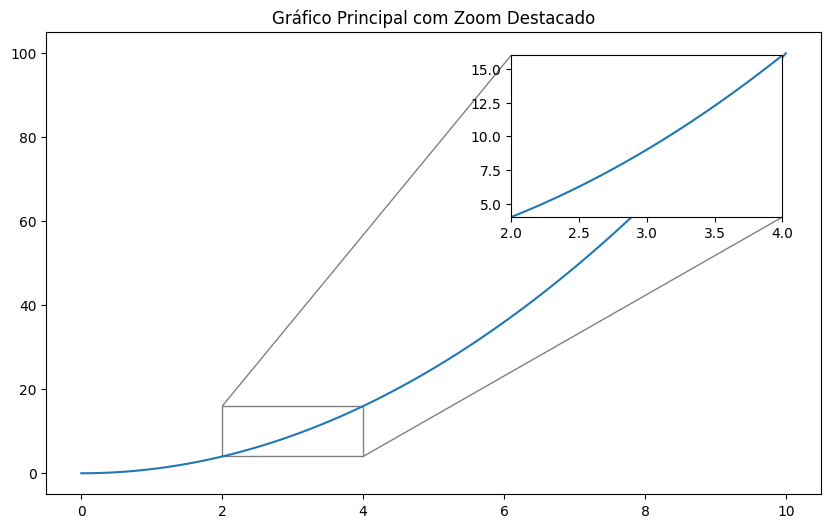

In [21]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = plt.subplots(figsize=(10, 6))

# Plot principal
ax.plot(x, y4)
ax.set_title('Gráfico Principal com Zoom Destacado')

# Criando o inset
axins = ax.inset_axes([0.6, 0.6, 0.35, 0.35])
axins.plot(x, y4)

# Definindo limites do zoom
x1, x2, y1, y2 = 2, 4, 4, 16
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# Marcando a região do zoom
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()

## 5. Tipos de Plots Avançados com Matplotlib
Este notebook explora visualizações mais avançadas disponíveis no Matplotlib.

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns  # Para os violin plots

### 5.1 Contour Plots
Contour plots são úteis para visualizar dados em 3D em um plano 2D, como mapas topográficos.

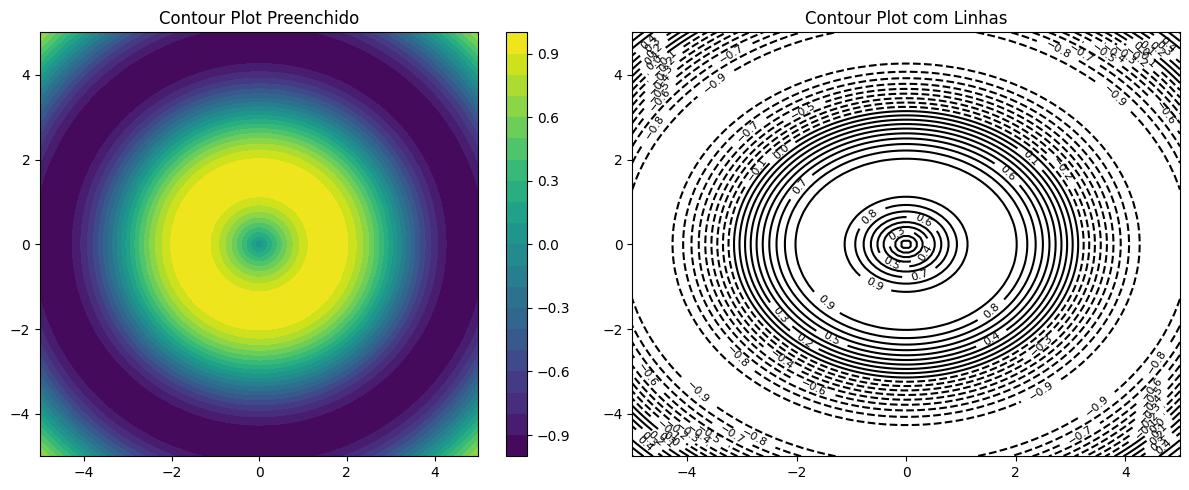

In [25]:
# Criando dados para o contour plot
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

plt.figure(figsize=(12, 5))

# Plot de contorno preenchido
plt.subplot(121)
contour = plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour)
plt.title('Contour Plot Preenchido')

# Plot de contorno com linhas
plt.subplot(122)
contour_lines = plt.contour(X, Y, Z, levels=20, colors='black')
plt.clabel(contour_lines, inline=True, fontsize=8)
plt.title('Contour Plot com Linhas')

plt.tight_layout()
plt.show()

### 5.2 Violin Plots
Violin plots combinam box plots com estimativas de densidade de kernel, mostrando a distribuição dos dados.


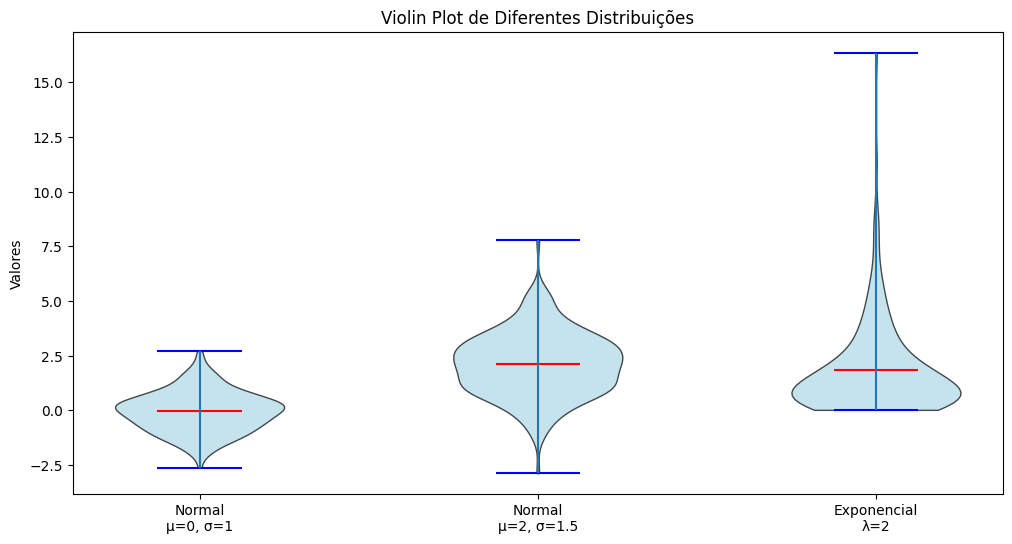

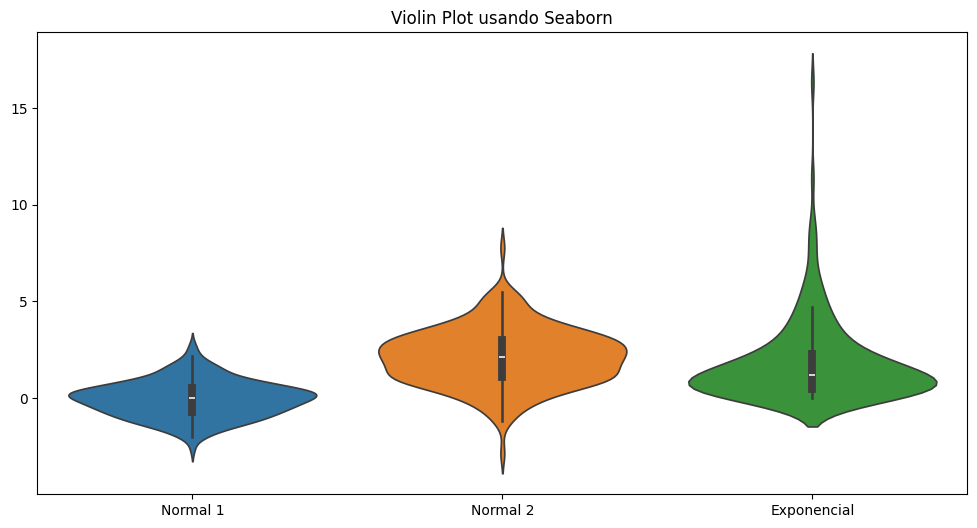

In [26]:
# Gerando dados para o violin plot
np.random.seed(42)
data1 = np.random.normal(0, 1, 200)
data2 = np.random.normal(2, 1.5, 200)
data3 = np.random.exponential(2, 200)

plt.figure(figsize=(12, 6))

# Criando violin plot
data = [data1, data2, data3]
violin = plt.violinplot(data, showmeans=True, showextrema=True)

# Customizando o violin plot
for pc in violin['bodies']:
    pc.set_facecolor('lightblue')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

violin['cmeans'].set_color('red')
violin['cmaxes'].set_color('blue')
violin['cmins'].set_color('blue')

plt.xticks([1, 2, 3], ['Normal\nμ=0, σ=1', 'Normal\nμ=2, σ=1.5', 'Exponencial\nλ=2'])
plt.title('Violin Plot de Diferentes Distribuições')
plt.ylabel('Valores')

plt.show()

# Comparação com Seaborn (mais fácil de usar)
plt.figure(figsize=(12, 6))
data_dict = {
    'Normal 1': data1,
    'Normal 2': data2,
    'Exponencial': data3
}
sns.violinplot(data=data_dict)
plt.title('Violin Plot usando Seaborn')
plt.show()

### 5.3 3D Plots
Matplotlib pode criar visualizações tridimensionais completas.

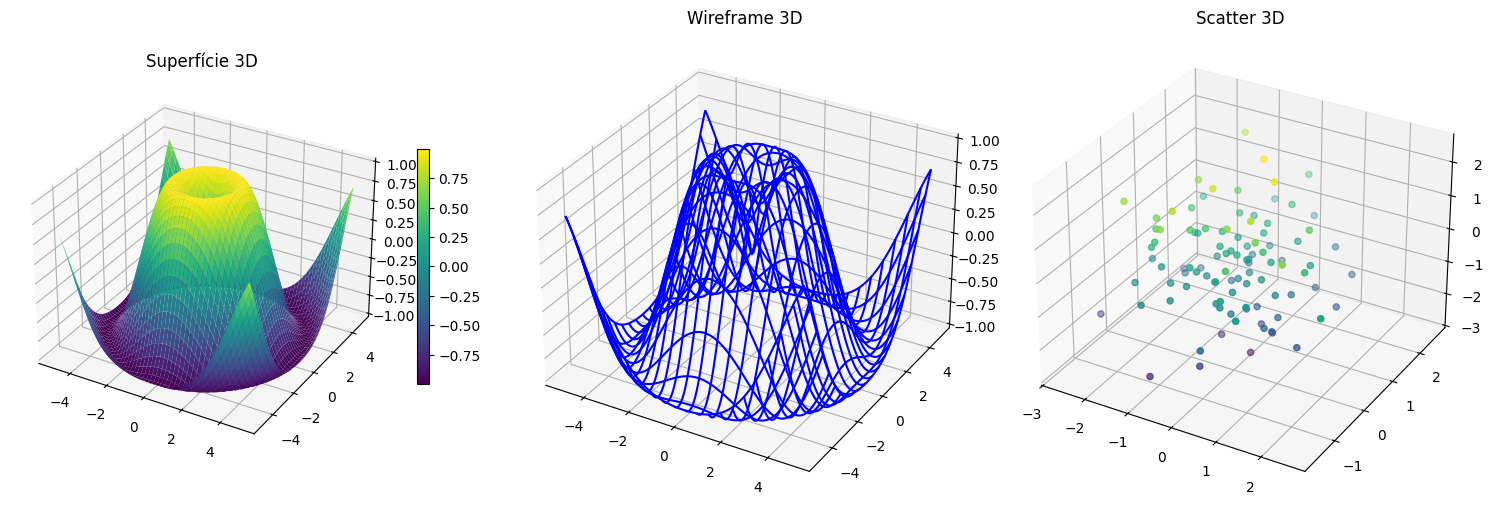

In [27]:
# Superfície 3D
fig = plt.figure(figsize=(15, 5))

# Primeiro plot: Superfície
ax1 = fig.add_subplot(131, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_title('Superfície 3D')
fig.colorbar(surf, ax=ax1, shrink=0.5)

# Segundo plot: Wireframe
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_wireframe(X, Y, Z, color='blue', rstride=5, cstride=5)
ax2.set_title('Wireframe 3D')

# Terceiro plot: Scatter 3D
ax3 = fig.add_subplot(133, projection='3d')
z = np.random.normal(0, 1, 100)
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)
ax3.scatter(x, y, z, c=z, cmap='viridis')
ax3.set_title('Scatter 3D')

plt.tight_layout()
plt.show()

### 5.4 Polar Plots
Polar plots são úteis para dados cíclicos ou direcionais.

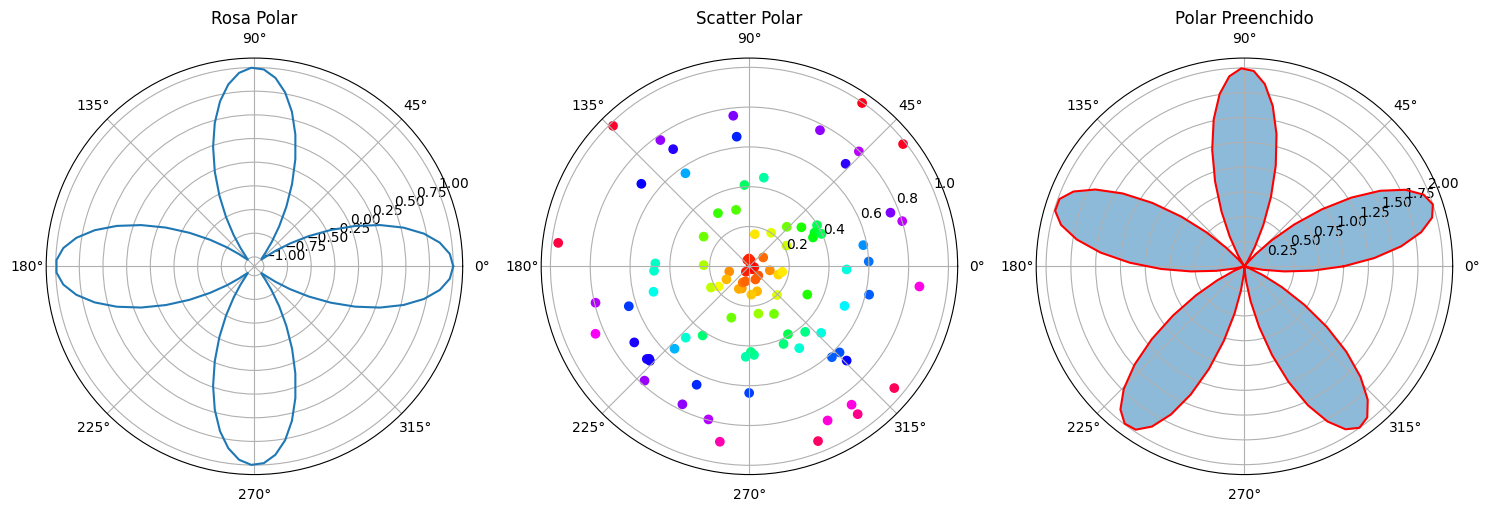

In [28]:
# Diferentes exemplos de plots polares
fig = plt.figure(figsize=(15, 5))

# Plot polar simples
ax1 = fig.add_subplot(131, projection='polar')
theta = np.linspace(0, 2*np.pi, 100)
r = np.cos(4*theta)
ax1.plot(theta, r)
ax1.set_title('Rosa Polar')

# Scatter polar
ax2 = fig.add_subplot(132, projection='polar')
theta = np.random.uniform(0, 2*np.pi, 100)
r = np.random.uniform(0, 1, 100)
ax2.scatter(theta, r, c=r, cmap='hsv')
ax2.set_title('Scatter Polar')

# Polar com preenchimento
ax3 = fig.add_subplot(133, projection='polar')
theta = np.linspace(0, 2*np.pi, 100)
r = 1 + np.sin(5*theta)
ax3.fill(theta, r, alpha=0.5)
ax3.plot(theta, r, 'r')
ax3.set_title('Polar Preenchido')

plt.tight_layout()
plt.show()

### 5.5 Stream Plots
Stream plots são úteis para visualizar campos vetoriais.

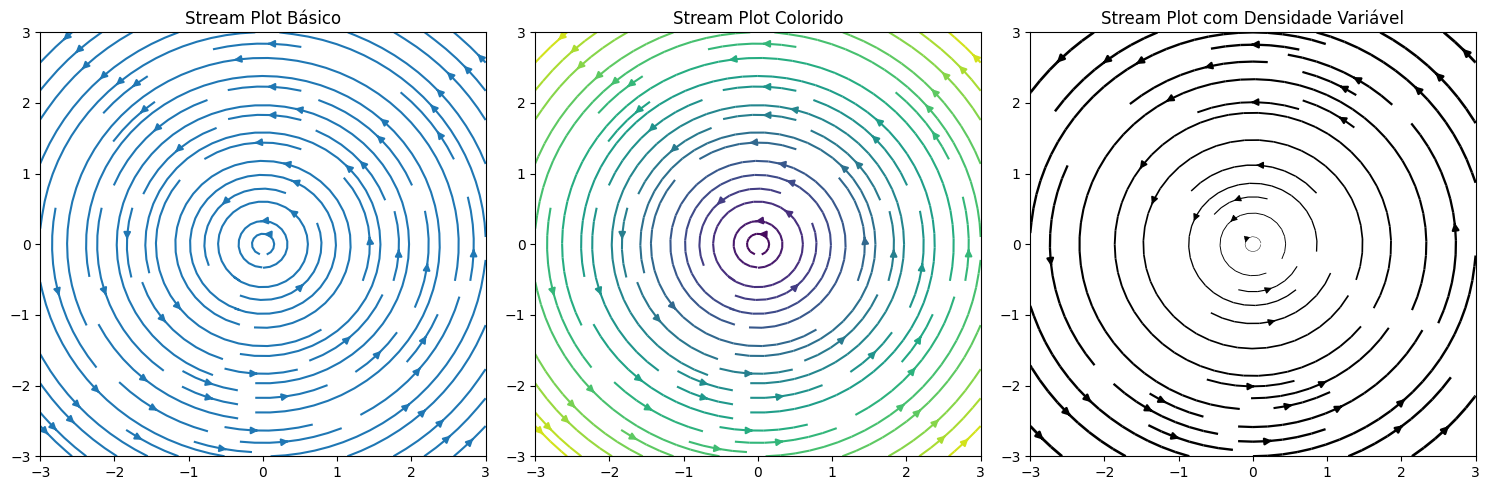

In [29]:
# Criando dados para o stream plot
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Definindo o campo vetorial
U = -Y
V = X

plt.figure(figsize=(15, 5))

# Stream plot básico
plt.subplot(131)
plt.streamplot(X, Y, U, V)
plt.title('Stream Plot Básico')

# Stream plot com cores baseadas na velocidade
plt.subplot(132)
speed = np.sqrt(U**2 + V**2)
plt.streamplot(X, Y, U, V, color=speed, cmap='viridis')
plt.title('Stream Plot Colorido')

# Stream plot com densidade variável
plt.subplot(133)
plt.streamplot(X, Y, U, V, density=[0.5, 1], color='k',
              linewidth=np.sqrt(speed))
plt.title('Stream Plot com Densidade Variável')

plt.tight_layout()
plt.show()

## 6. Integração com outras bibliotecas

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### 6.1 Matplotlib com NumPy
NumPy é a base para manipulação numérica em Python e integra-se naturalmente com Matplotlib.

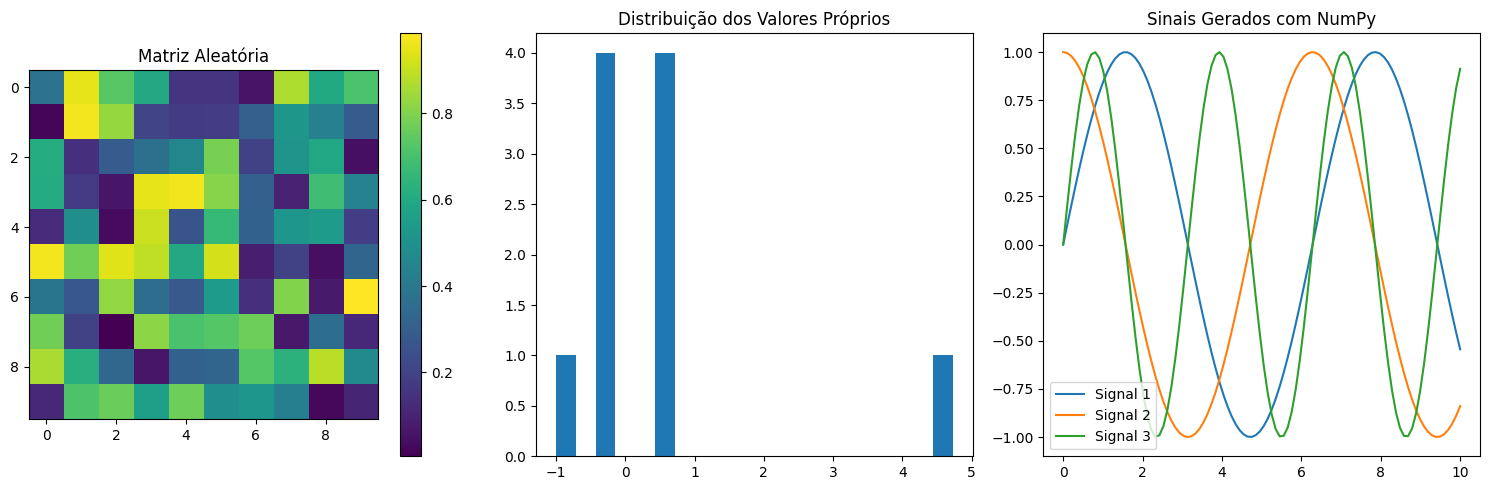

In [30]:
# Arrays multidimensionais
matrix = np.random.rand(10, 10)
eigenvalues = np.linalg.eigvals(matrix)

plt.figure(figsize=(15, 5))

# Plot 1: Visualização de matriz
plt.subplot(131)
plt.imshow(matrix, cmap='viridis')
plt.colorbar()
plt.title('Matriz Aleatória')

# Plot 2: Histograma de valores próprios
plt.subplot(132)
plt.hist(eigenvalues.real, bins=20)
plt.title('Distribuição dos Valores Próprios')

# Plot 3: Operações com arrays
x = np.linspace(0, 10, 100)
signals = np.vstack([np.sin(x), np.cos(x), np.sin(2*x)])

plt.subplot(133)
for i, signal in enumerate(signals):
    plt.plot(x, signal, label=f'Signal {i+1}')
plt.legend()
plt.title('Sinais Gerados com NumPy')

plt.tight_layout()
plt.show()

### 6.2 Matplotlib com Pandas
Pandas oferece funcionalidades poderosas para análise de dados e tem métodos de plotting integrados baseados no Matplotlib.

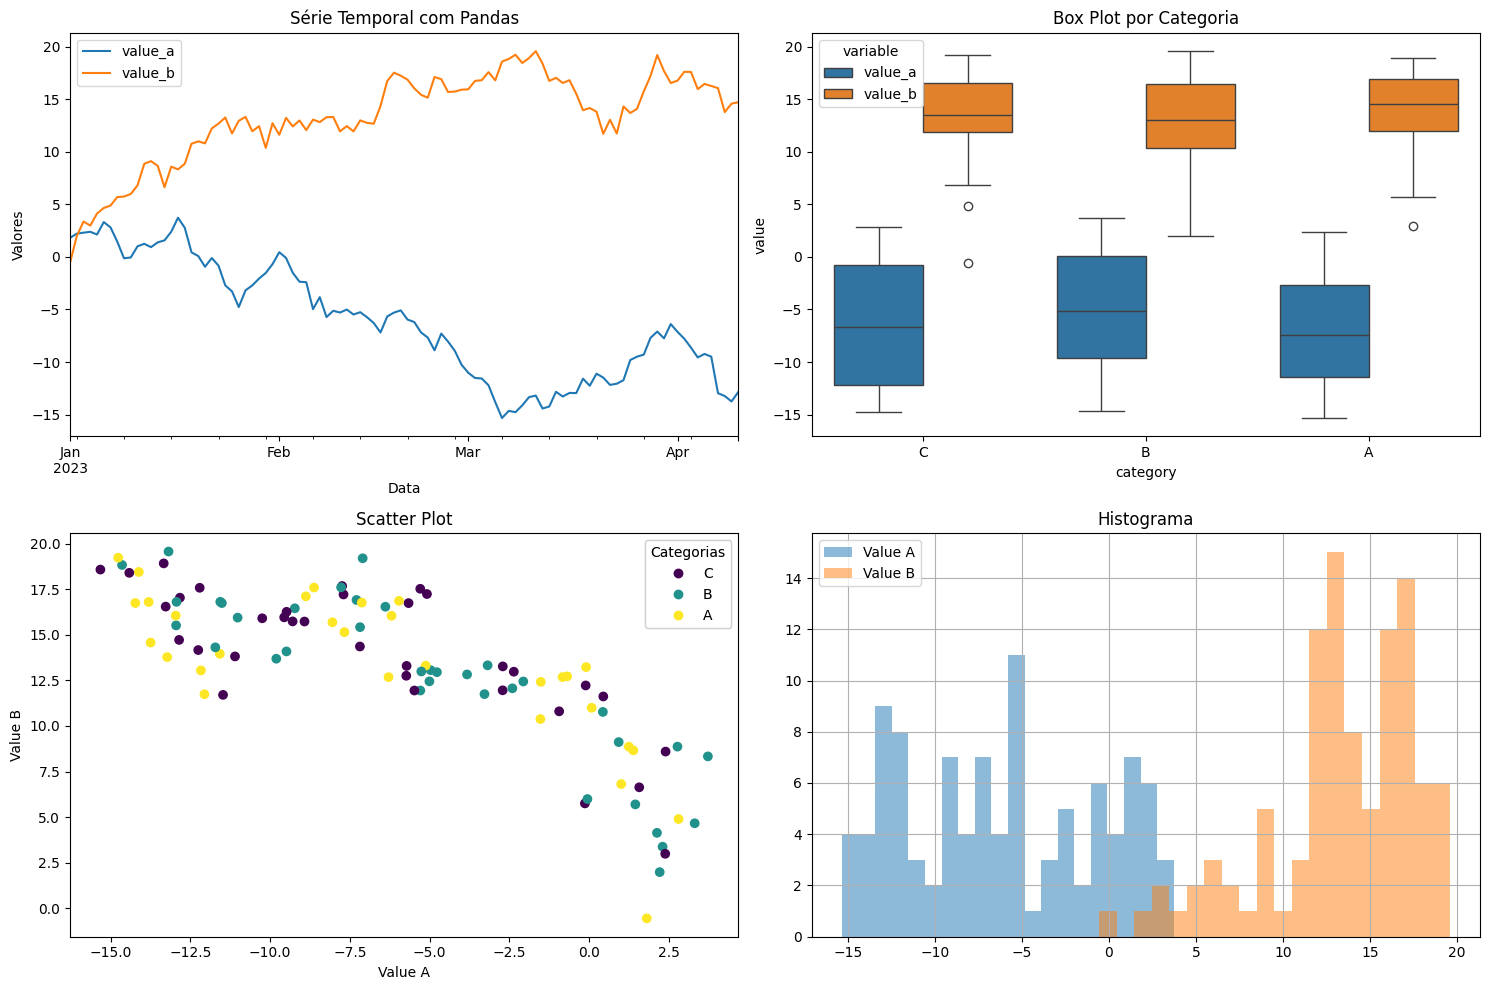

<Figure size 1000x600 with 0 Axes>

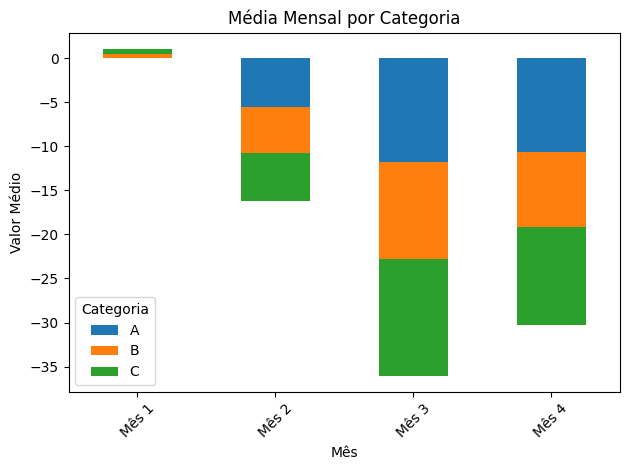

In [34]:
# Criando um DataFrame de exemplo
dates = pd.date_range('2023-01-01', periods=100)
df = pd.DataFrame({
    'date': dates,
    'value_a': np.random.randn(100).cumsum(),
    'value_b': np.random.randn(100).cumsum(),
    'category': np.random.choice(['A', 'B', 'C'], 100)
})

# Criando a figura principal com subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Series temporal direto do Pandas (top-left)
df.set_index('date').plot(y=['value_a', 'value_b'], ax=axes[0,0])
axes[0,0].set_title('Série Temporal com Pandas')
axes[0,0].set_xlabel('Data')
axes[0,0].set_ylabel('Valores')

# Plot 2: Box plot por categoria (top-right)
data_melted = pd.melt(df, id_vars=['category'], value_vars=['value_a', 'value_b'])
sns.boxplot(data=data_melted, x='category', y='value', hue='variable', ax=axes[0,1])
axes[0,1].set_title('Box Plot por Categoria')

# Plot 3: Scatter plot (bottom-left)
scatter = axes[1,0].scatter(df['value_a'], df['value_b'], 
                          c=pd.Categorical(df['category']).codes,
                          cmap='viridis')
axes[1,0].set_title('Scatter Plot')
axes[1,0].set_xlabel('Value A')
axes[1,0].set_ylabel('Value B')
legend1 = axes[1,0].legend(scatter.legend_elements()[0], 
                          df['category'].unique(),
                          title="Categorias")
axes[1,0].add_artist(legend1)

# Plot 4: Histograma (bottom-right)
df['value_a'].hist(ax=axes[1,1], alpha=0.5, label='Value A', bins=20)
df['value_b'].hist(ax=axes[1,1], alpha=0.5, label='Value B', bins=20)
axes[1,1].set_title('Histograma')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Criando pivot table e visualização
pivot_data = df.pivot_table(
    values='value_a',
    index=df['date'].dt.month,
    columns='category',
    aggfunc='mean'
)

# Plot do pivot table
plt.figure(figsize=(10, 6))
ax = pivot_data.plot(kind='bar', stacked=True)
plt.title('Média Mensal por Categoria')
plt.xlabel('Mês')
plt.ylabel('Valor Médio')
plt.legend(title='Categoria')
plt.xticks(range(len(pivot_data.index)), 
          [f'Mês {i}' for i in pivot_data.index], 
          rotation=45)
plt.tight_layout()
plt.show()

### 6.3 Matplotlib com Seaborn
Seaborn é construído sobre o Matplotlib e oferece uma interface mais alta para visualizações estatísticas.

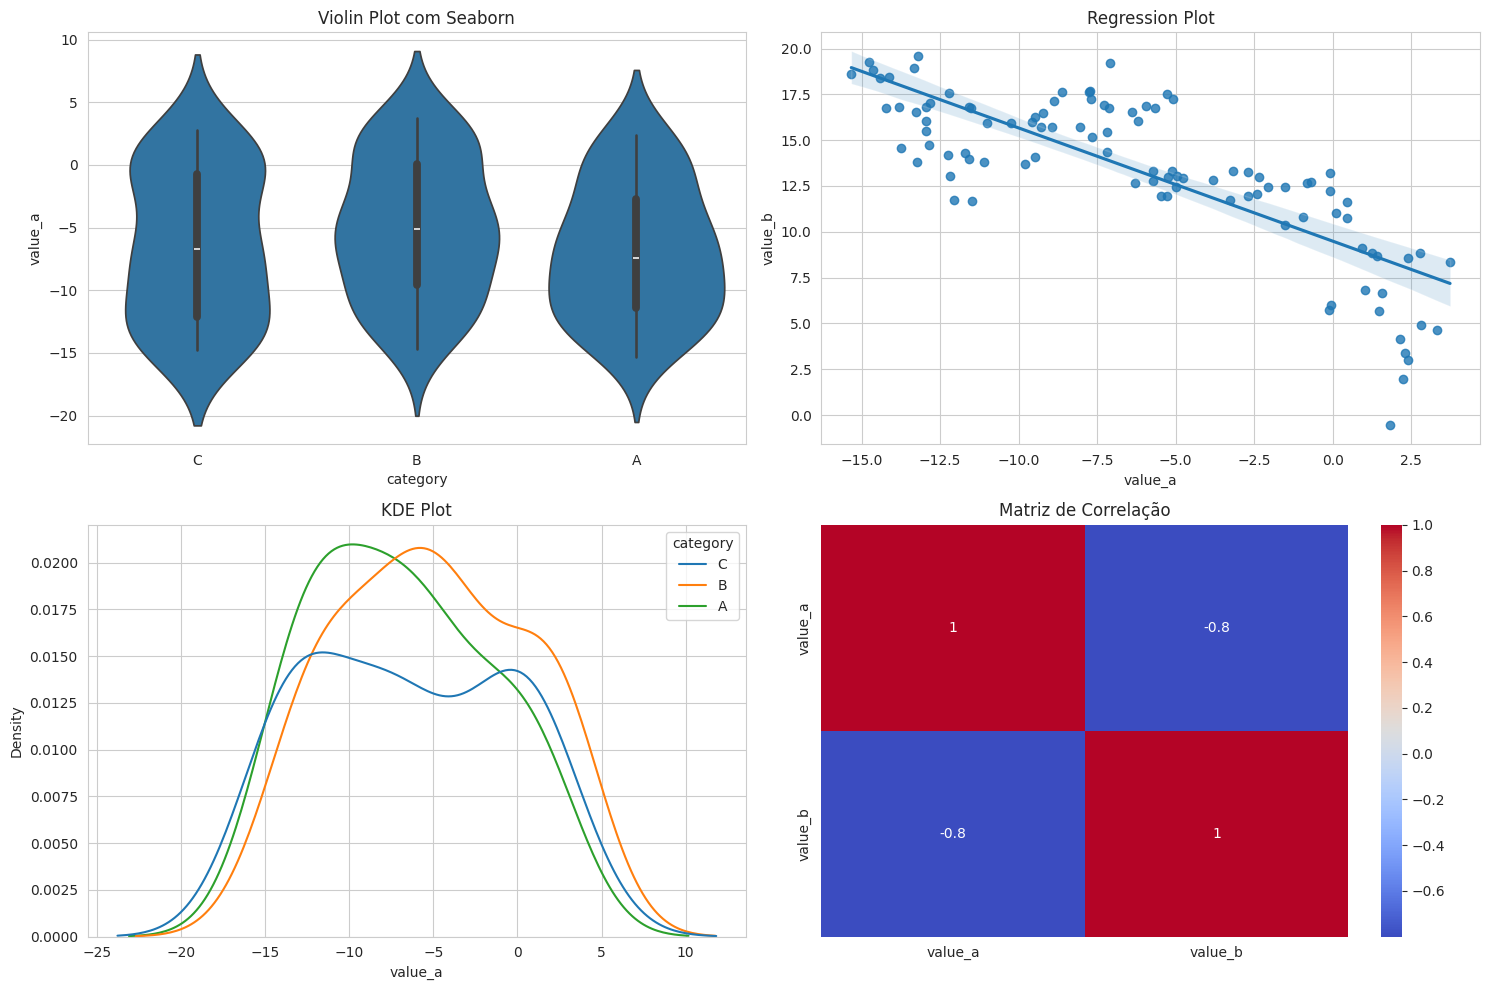

In [35]:
# Configurando o estilo do Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# Plot 1: Violin plot com Seaborn
plt.subplot(221)
sns.violinplot(data=df, x='category', y='value_a')
plt.title('Violin Plot com Seaborn')

# Plot 2: Regression plot
plt.subplot(222)
sns.regplot(data=df, x='value_a', y='value_b')
plt.title('Regression Plot')

# Plot 3: KDE plot
plt.subplot(223)
sns.kdeplot(data=df, x='value_a', hue='category')
plt.title('KDE Plot')

# Plot 4: Heatmap de correlação
plt.subplot(224)
correlation = df[['value_a', 'value_b']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')

plt.tight_layout()
plt.show()

## 7. Melhores Práticas e Otimização
### 7.1 Escolhendo o tipo de plot correto
A escolha do tipo de visualização correto é crucial para comunicar efetivamente seus dados.

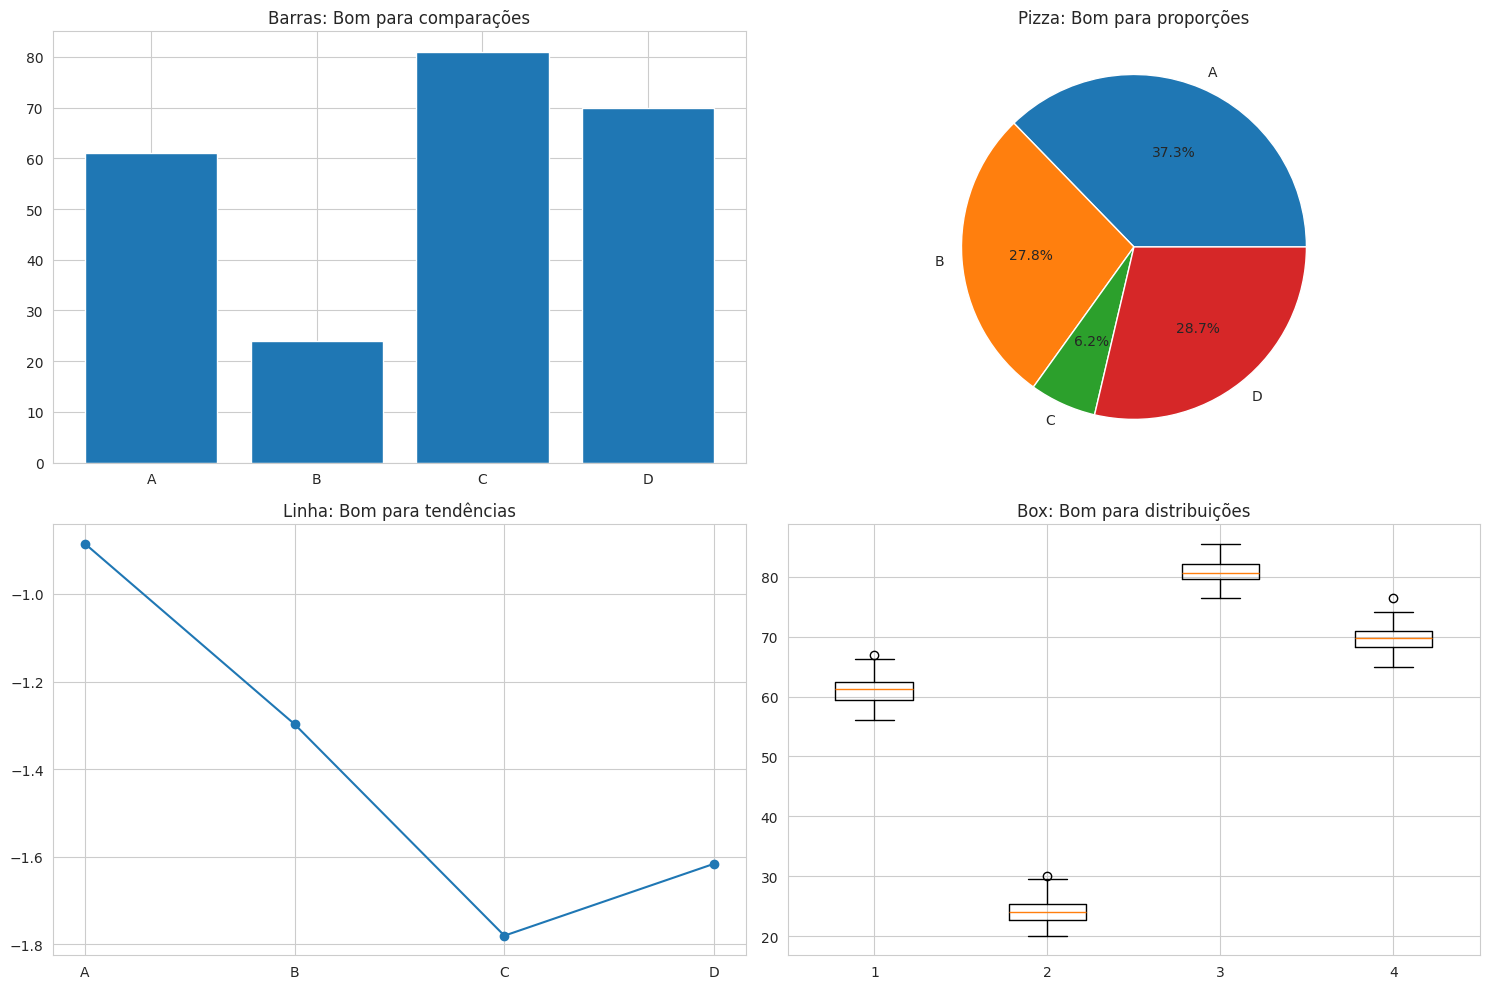

In [36]:
# Exemplo de diferentes visualizações para o mesmo conjunto de dados
np.random.seed(42)
data = {
    'categorias': ['A', 'B', 'C', 'D'],
    'valores': np.random.randint(10, 100, 4),
    'proporções': np.random.random(4),
    'tendências': np.random.randn(4).cumsum()
}

plt.figure(figsize=(15, 10))

# Dados categóricos
plt.subplot(221)
plt.bar(data['categorias'], data['valores'])
plt.title('Barras: Bom para comparações')

# Proporções
plt.subplot(222)
plt.pie(data['proporções'], labels=data['categorias'], autopct='%1.1f%%')
plt.title('Pizza: Bom para proporções')

# Tendências
plt.subplot(223)
plt.plot(data['categorias'], data['tendências'], marker='o')
plt.title('Linha: Bom para tendências')

# Distribuição
plt.subplot(224)
plt.boxplot([np.random.normal(v, 2, 100) for v in data['valores']])
plt.title('Box: Bom para distribuições')

plt.tight_layout()
plt.show()

### 7.2 Otimização de Performance

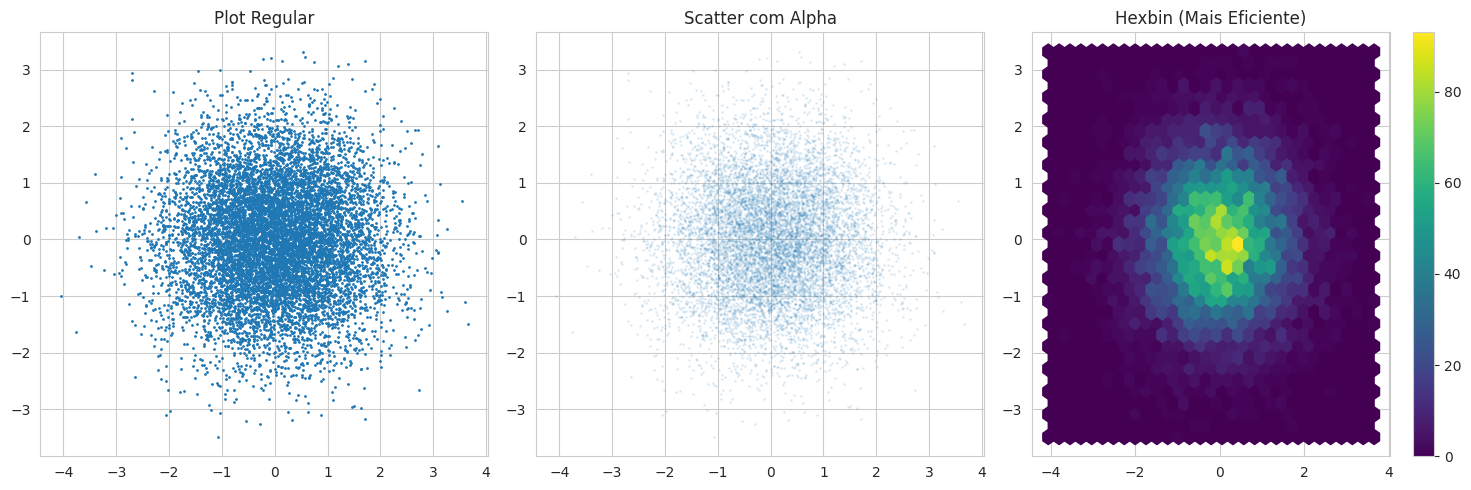

In [37]:
n_points = 10000

plt.figure(figsize=(15, 5))

# Método 1: Plot regular (mais lento para muitos pontos)
plt.subplot(131)
x = np.random.randn(n_points)
y = np.random.randn(n_points)
plt.plot(x, y, 'o', markersize=1)
plt.title('Plot Regular')

# Método 2: Scatter com alpha (melhor para muitos pontos)
plt.subplot(132)
plt.scatter(x, y, s=1, alpha=0.1)
plt.title('Scatter com Alpha')

# Método 3: Hexbin (otimizado para densidade)
plt.subplot(133)
plt.hexbin(x, y, gridsize=30, cmap='viridis')
plt.colorbar()
plt.title('Hexbin (Mais Eficiente)')

plt.tight_layout()
plt.show()

### 7.3 Exportando e Salvando Figuras

In [39]:
# Exemplo de diferentes formatos e configurações de salvamento

# Criando uma figura de exemplo
plt.figure(figsize=(10, 6))
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), label='Seno')
plt.plot(x, np.cos(x), label='Cosseno')
plt.title('Exemplo de Figura')
plt.legend()

# Salvando em diferentes formatos e configurações
# PNG com DPI específico
plt.savefig('figura_alta_resolucao.png', dpi=300, bbox_inches='tight')

# PDF vetorial
plt.savefig('figura_vetorial.pdf', format='pdf', bbox_inches='tight')

# SVG para web
plt.savefig('figura_web.svg', format='svg', bbox_inches='tight')

plt.close()  # Importante fechar a figura após salvar

# Dicas para salvar figuras:
"""
1. Use 'bbox_inches="tight"' para evitar cortes
2. Escolha DPI apropriado:
   - 72-96 DPI para web
   - 300+ DPI para impressão
3. Formatos comuns:
   - PNG: para web e apresentações
   - PDF: para documentos e impressão
   - SVG: para web com zoom
"""

'\n1. Use \'bbox_inches="tight"\' para evitar cortes\n2. Escolha DPI apropriado:\n   - 72-96 DPI para web\n   - 300+ DPI para impressão\n3. Formatos comuns:\n   - PNG: para web e apresentações\n   - PDF: para documentos e impressão\n   - SVG: para web com zoom\n'

# Estrutura de Curso Matplotlib

## 1. Introdução ao Matplotlib
-  Instalação e configuração
-  Pyplot vs Object-Oriented Interface

## 2. Plots Básicos
- 2.1 Line plots
- 2.2 Scatter plots
- 2.3 Bar plots
- 2.4 Histograms
- 2.5 Pie charts

## 3. Customização de Plots
- 3.1 Cores, marcadores e estilos de linha
- 3.2 Eixos e limites
- 3.3 Legendas
- 3.4 Títulos e rótulos
- 3.5 Grid e ticks

## 4. Subplots e Layouts
- 4.1 Criando múltiplos subplots
- 4.2 Layouts com gridspec
- 4.3 Inset plots

## 5. Tipos de Plots Avançados
- 5.1 Contour plots
- 5.2 Heatmaps
- 5.3 3D plots
- 5.4 Polar plots
- 5.5 Stream plots

## 6. Integração com outras bibliotecas
- 6.1 Matplotlib com NumPy
- 6.2 Matplotlib com Pandas
- 6.3 Matplotlib com Seaborn

## 7. Melhores Práticas e Otimização
- 7.1 Escolhendo o tipo de plot correto
- 7.2 Otimização de performance
- 7.3 Exportando e salvando figuras

